In [2]:
import shutil
import zipfile
import os
import torch
import urllib.request
from IPython.display import Image, display

In [3]:
if os.path.exists('sample_data'):
  shutil.rmtree('sample_data')

In [4]:
if os.path.exists('yolov5'):
  shutil.rmtree('yolov5/runs')
else:
  !git clone https://github.com/ultralytics/yolov5
  %cd yolov5
  %pip install -r requirements.txt
  %cd ..

In [5]:
if not os.path.isfile('data.zip'):
  urllib.request.urlretrieve("https://github.com/Suman4sea/all-data/blob/main/data.zip?raw=true", "data.zip")

with zipfile.ZipFile("data.zip","r") as zip_ref:
    zip_ref.extractall(".")

os.remove('data.zip')

In [6]:
output_folder = 'output_models'
if os.path.exists(output_folder):
  shutil.rmtree(output_folder)
else :
  os.makedirs(output_folder)

In [7]:
if torch.cuda.is_available():
  device = 0
else:
  device = 'cpu'

Axial plane training

In [13]:
!python yolov5/train.py --img 480 --batch 64 --epochs 40 --data ./data/axial/axial.yaml --weights yolov5m.pt --device {device} --name axial --hyp ./data/augmentation.yaml
shutil.copyfile('yolov5/runs/train/axial/weights/best.pt', f'{output_folder}/tumor_detector_axial.pt')

2024-04-06 09:55:25.019550: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-06 09:55:25.019609: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-06 09:55:25.021051: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5m.pt, cfg=, data=./data/axial/axial.yaml, hyp=./data/augmentation.yaml, epochs=40, batch_size=64, imgsz=480, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=yolov5/data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, single_

'output_models/tumor_detector_axial.pt'

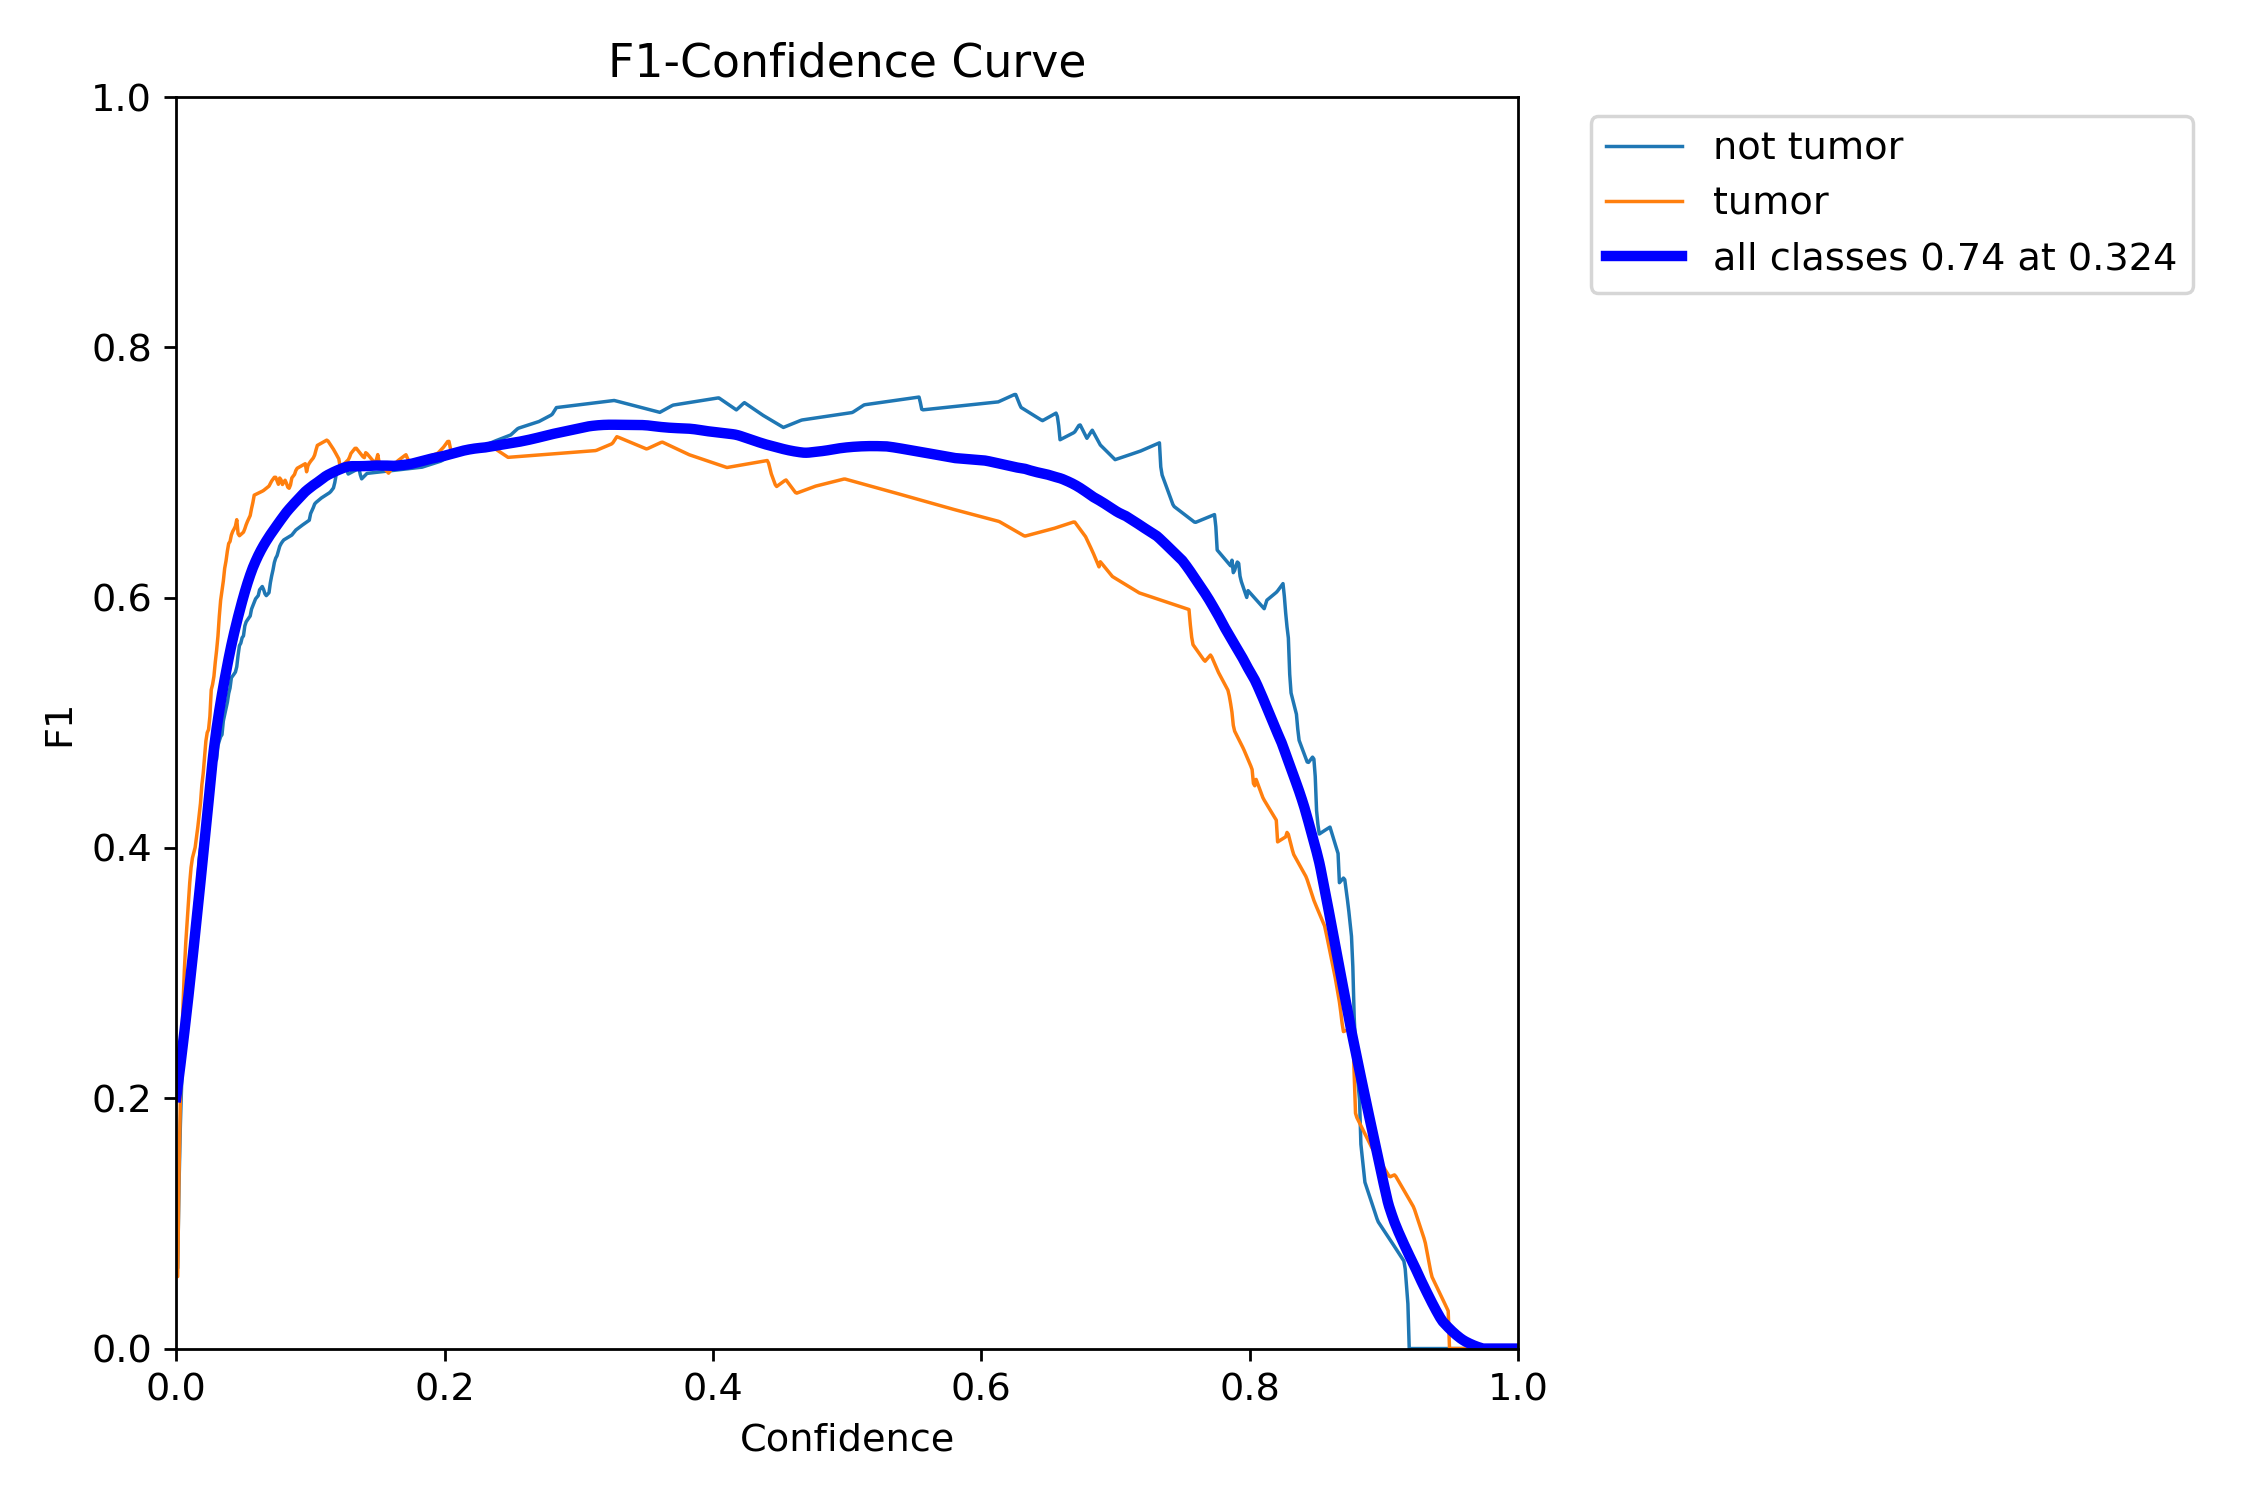

In [15]:
display(Image(filename='yolov5/runs/train/axial5/F1_curve.png'))


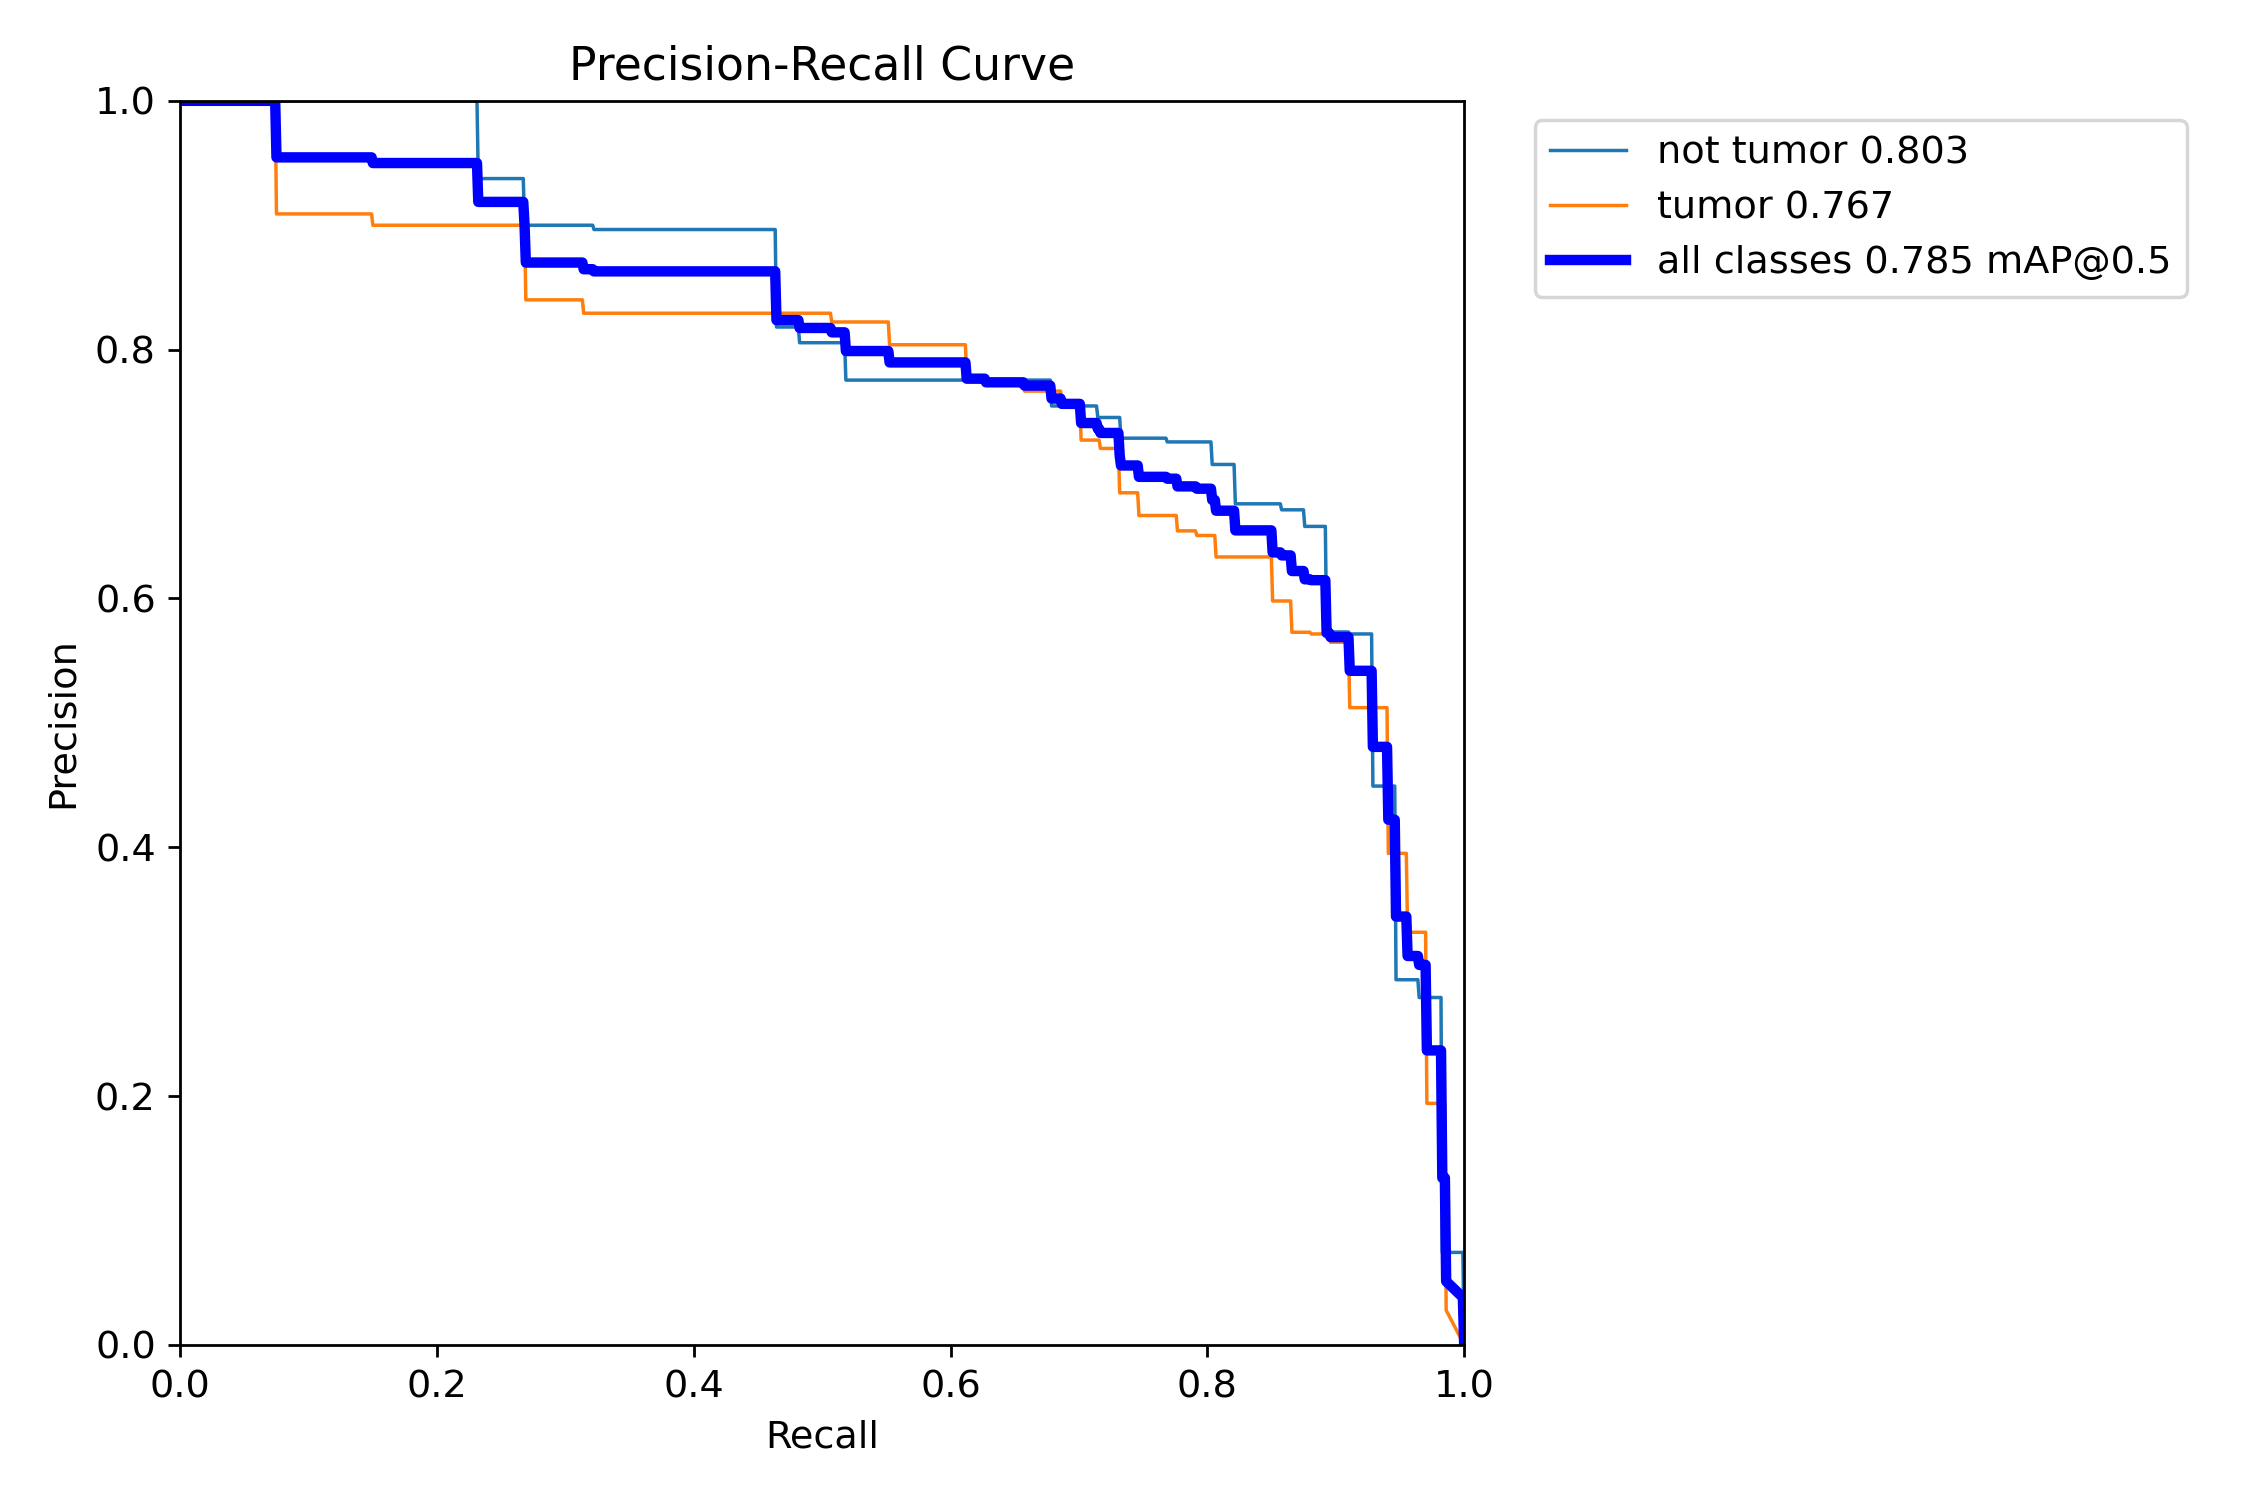

In [16]:
display(Image(filename='yolov5/runs/train/axial5/PR_curve.png'))


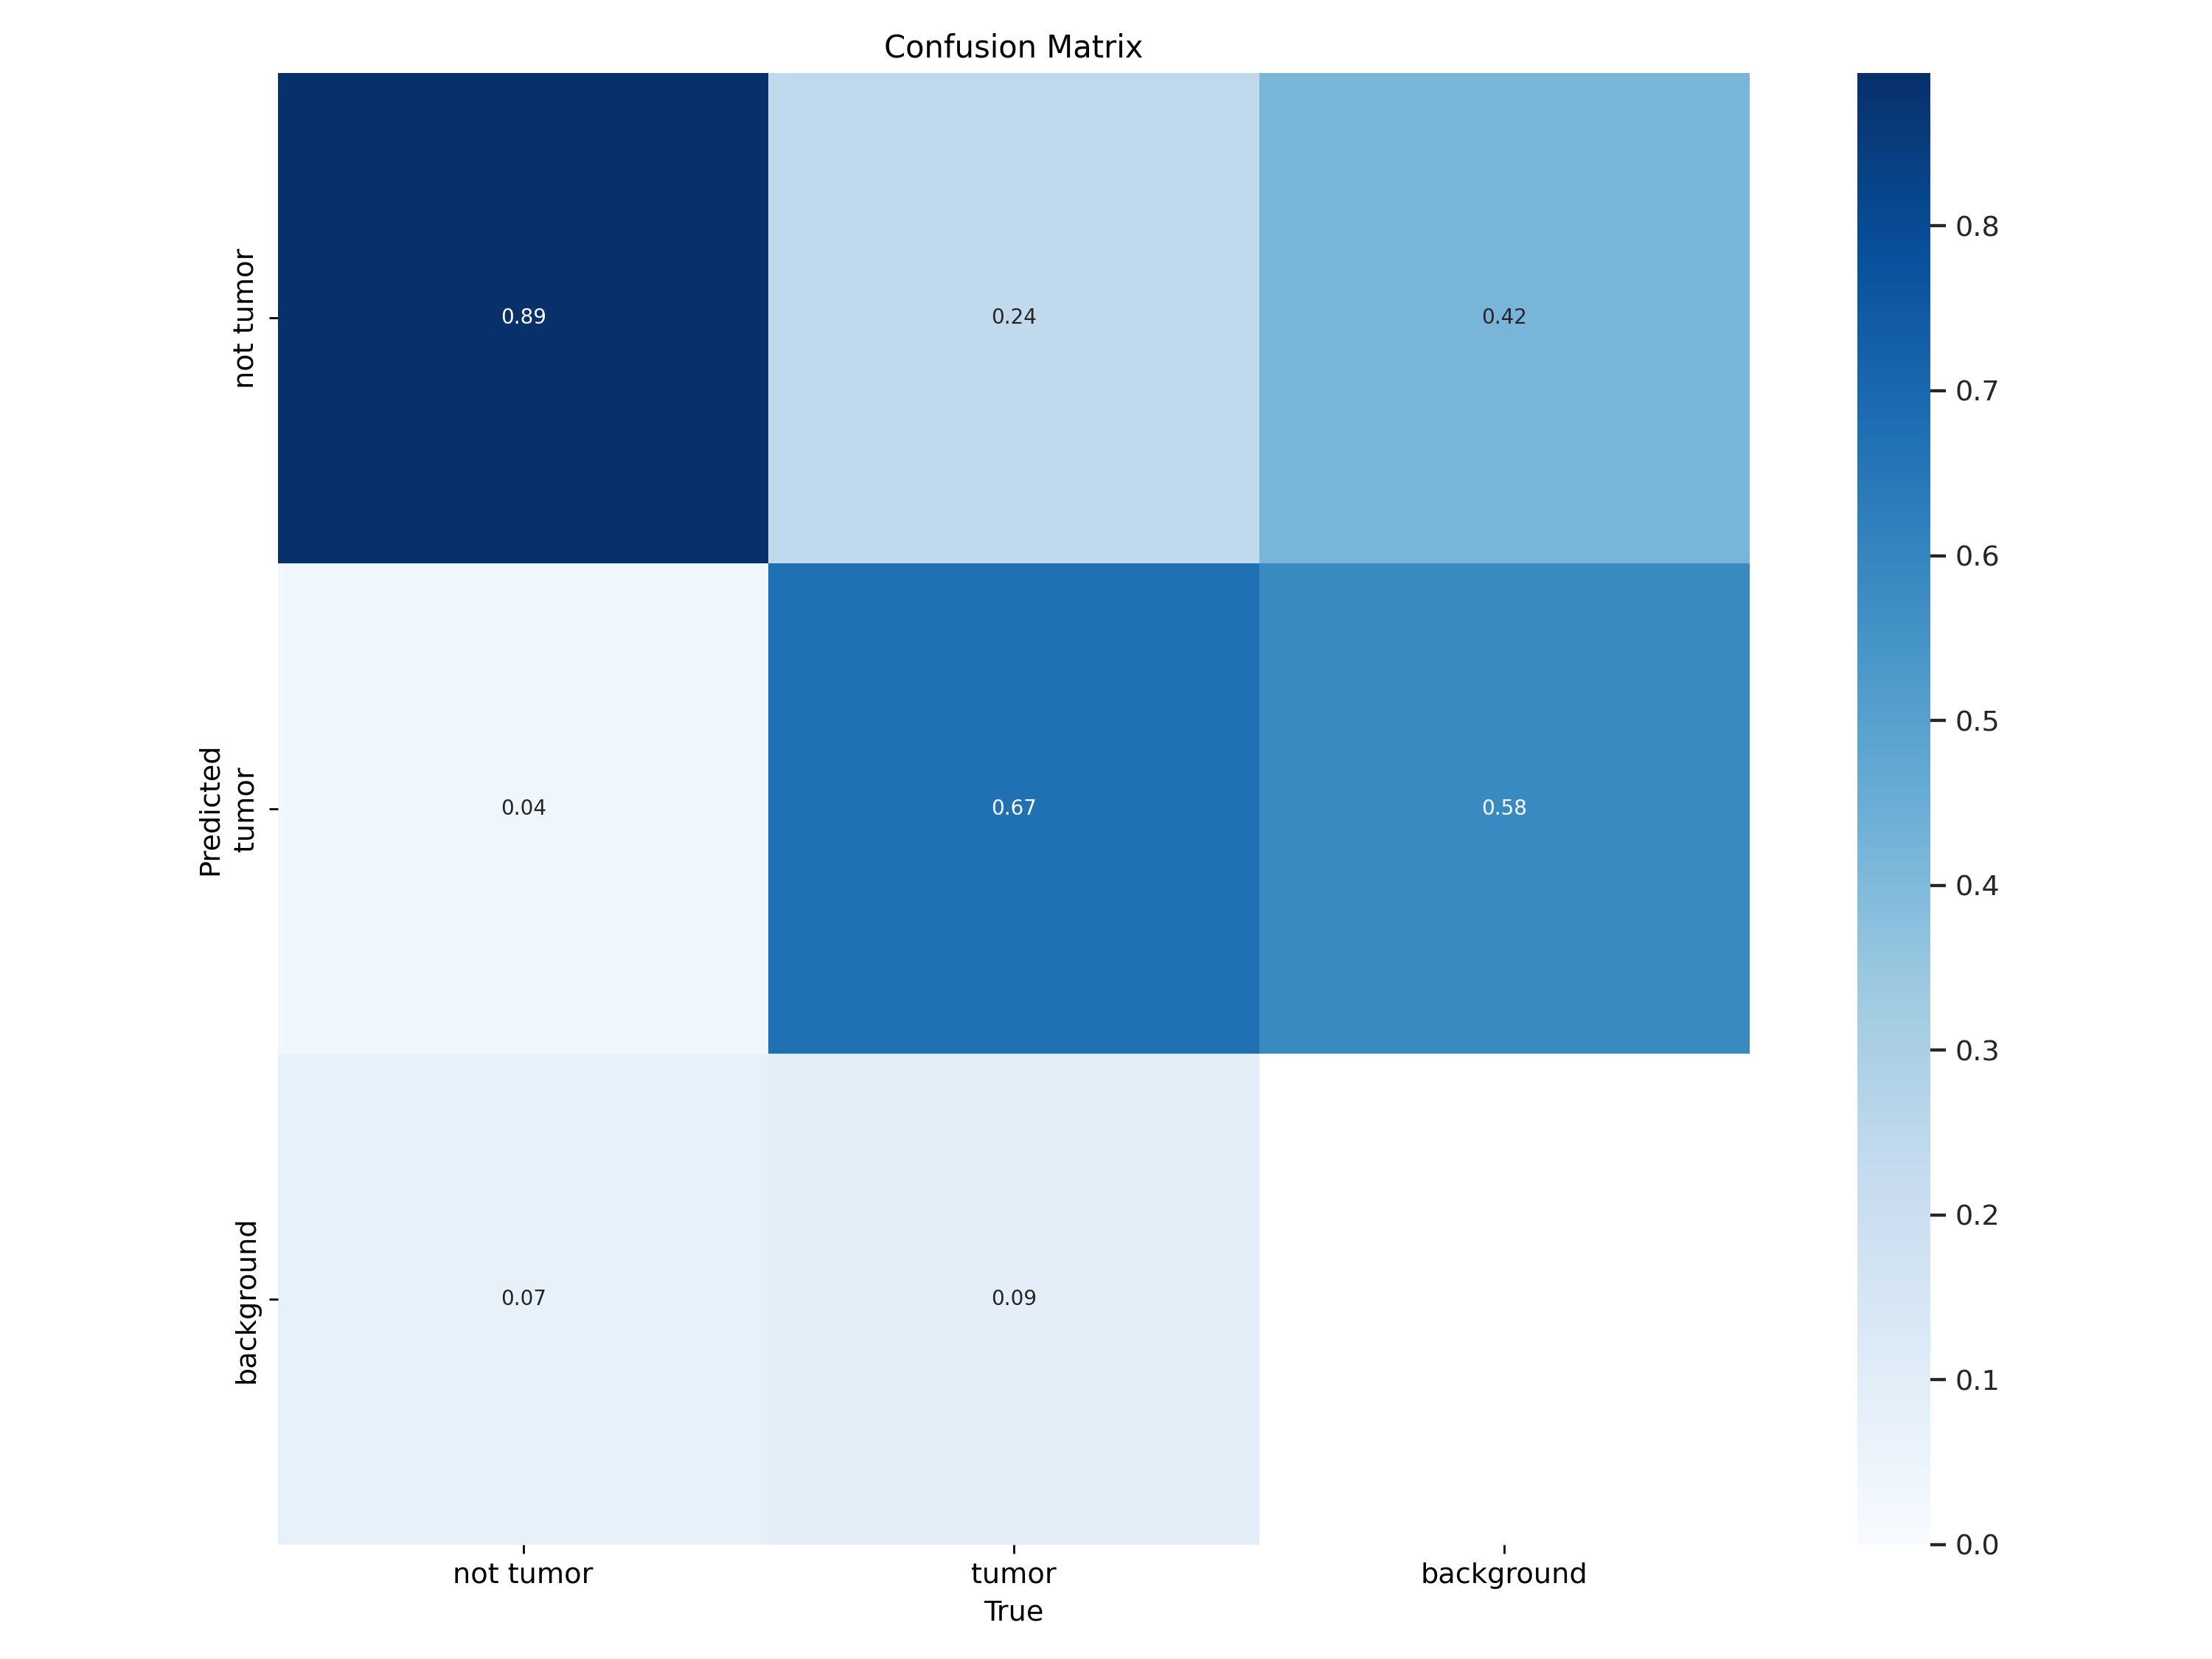

In [17]:
display(Image(filename='yolov5/runs/train/axial5/confusion_matrix.png'))


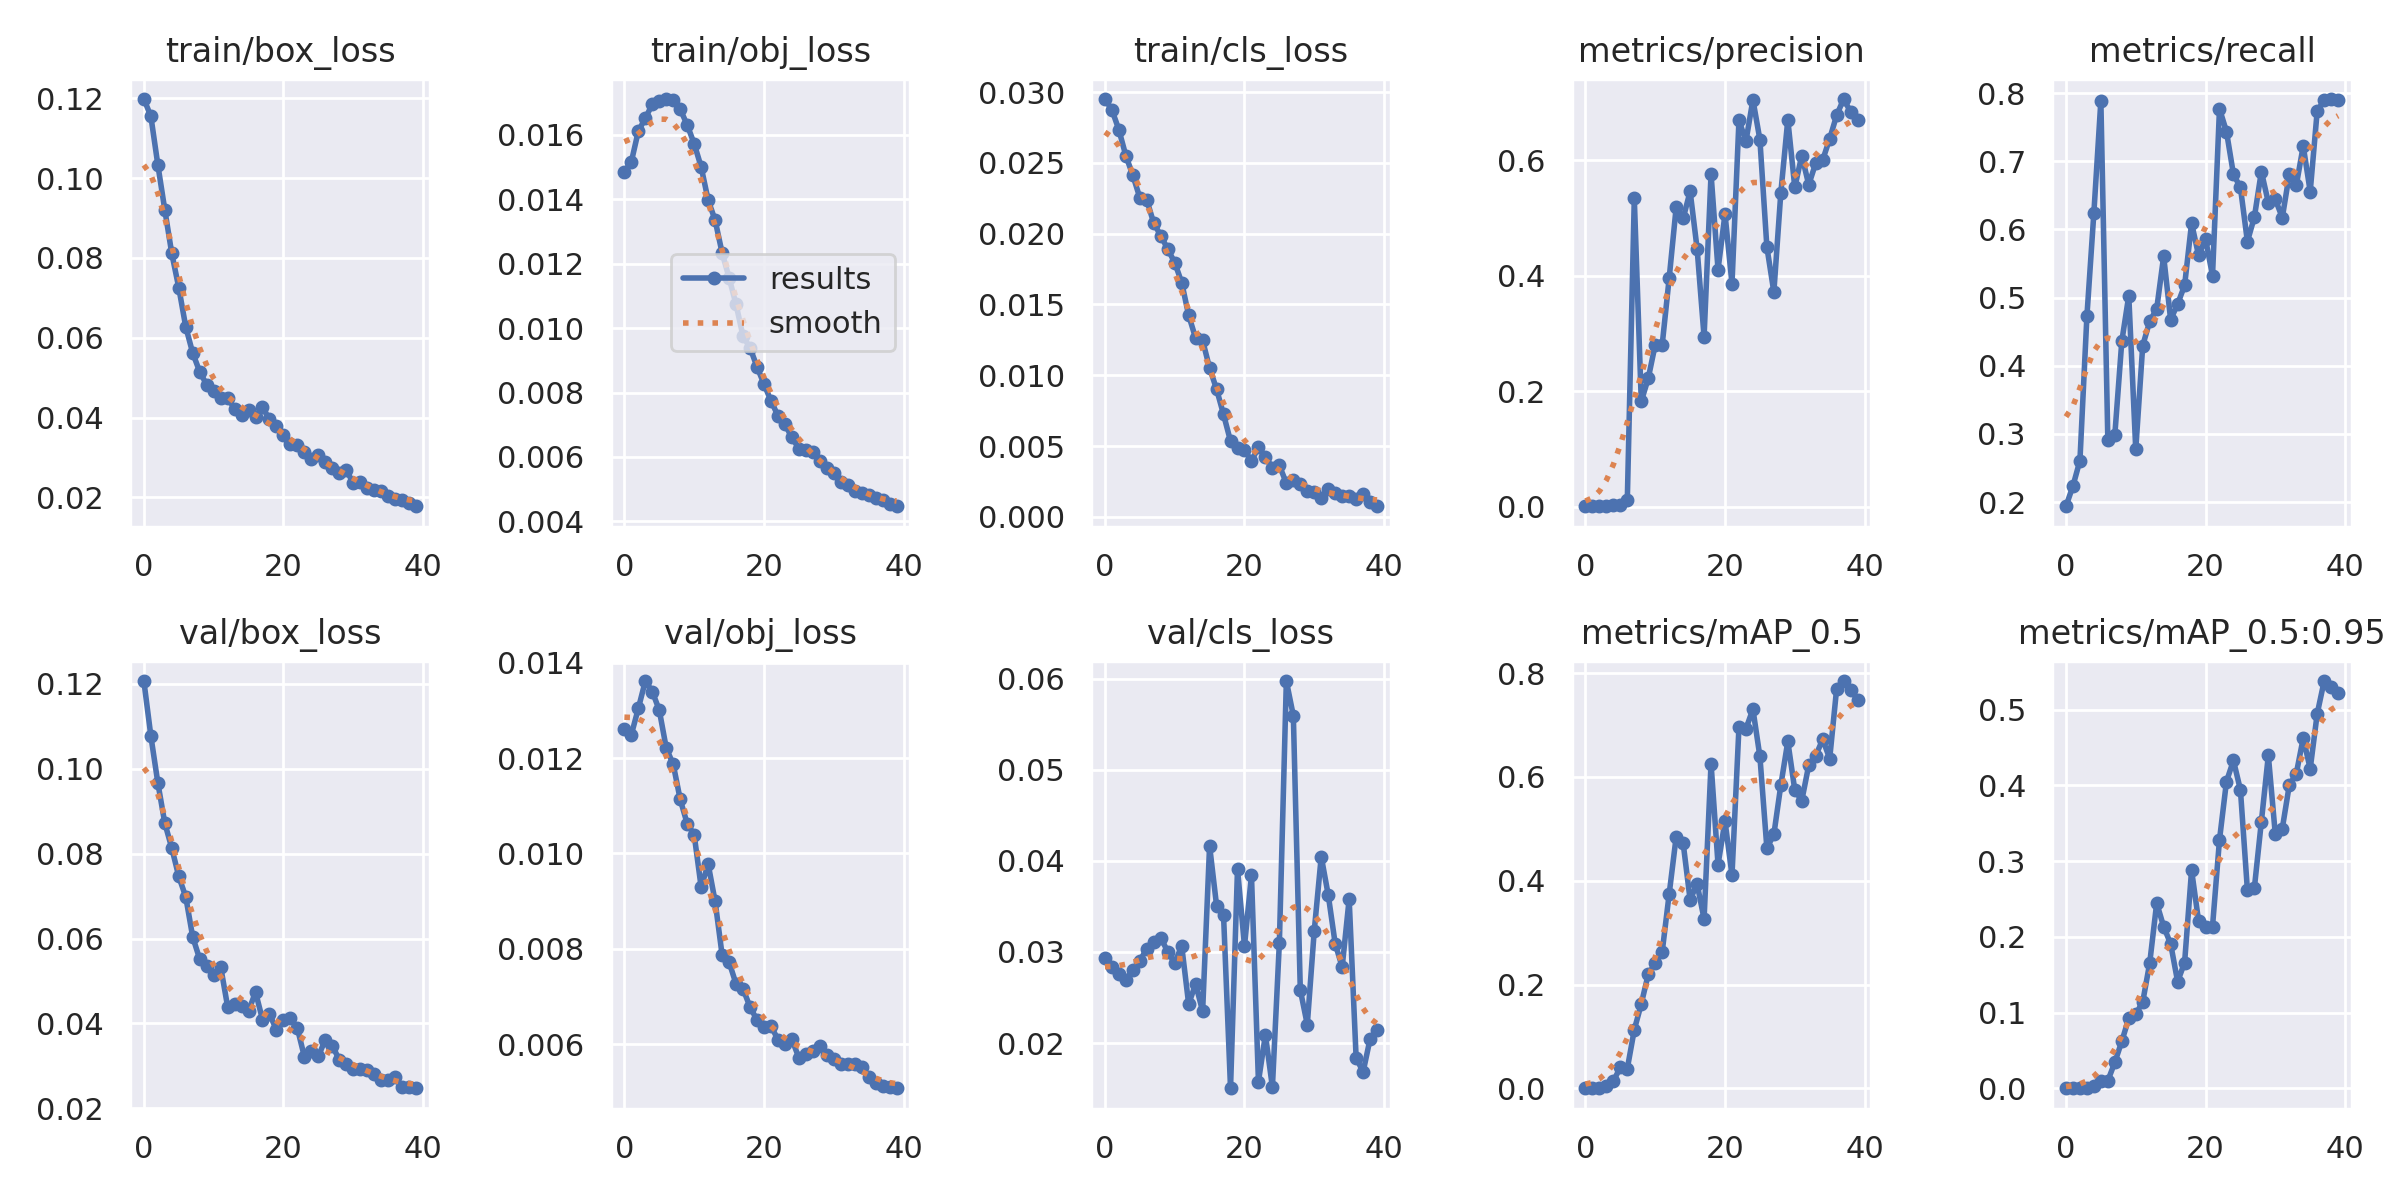

In [18]:
display(Image(filename='yolov5/runs/train/axial5/results.png'))


Coronal plane training

In [19]:
!python yolov5/train.py --img 480 --batch 80 --epochs 40 --data data/coronal/coronal.yaml --weights yolov5m.pt --device 0 --name coronal --hyp ./data/augmentation.yaml
shutil.copyfile('yolov5/runs/train/coronal/weights/best.pt', f'{output_folder}/tumor_detector_coronal.pt')

2024-04-06 10:04:33.215746: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-06 10:04:33.215795: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-06 10:04:33.217289: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5m.pt, cfg=, data=data/coronal/coronal.yaml, hyp=./data/augmentation.yaml, epochs=40, batch_size=80, imgsz=480, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=yolov5/data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, singl

'output_models/tumor_detector_coronal.pt'

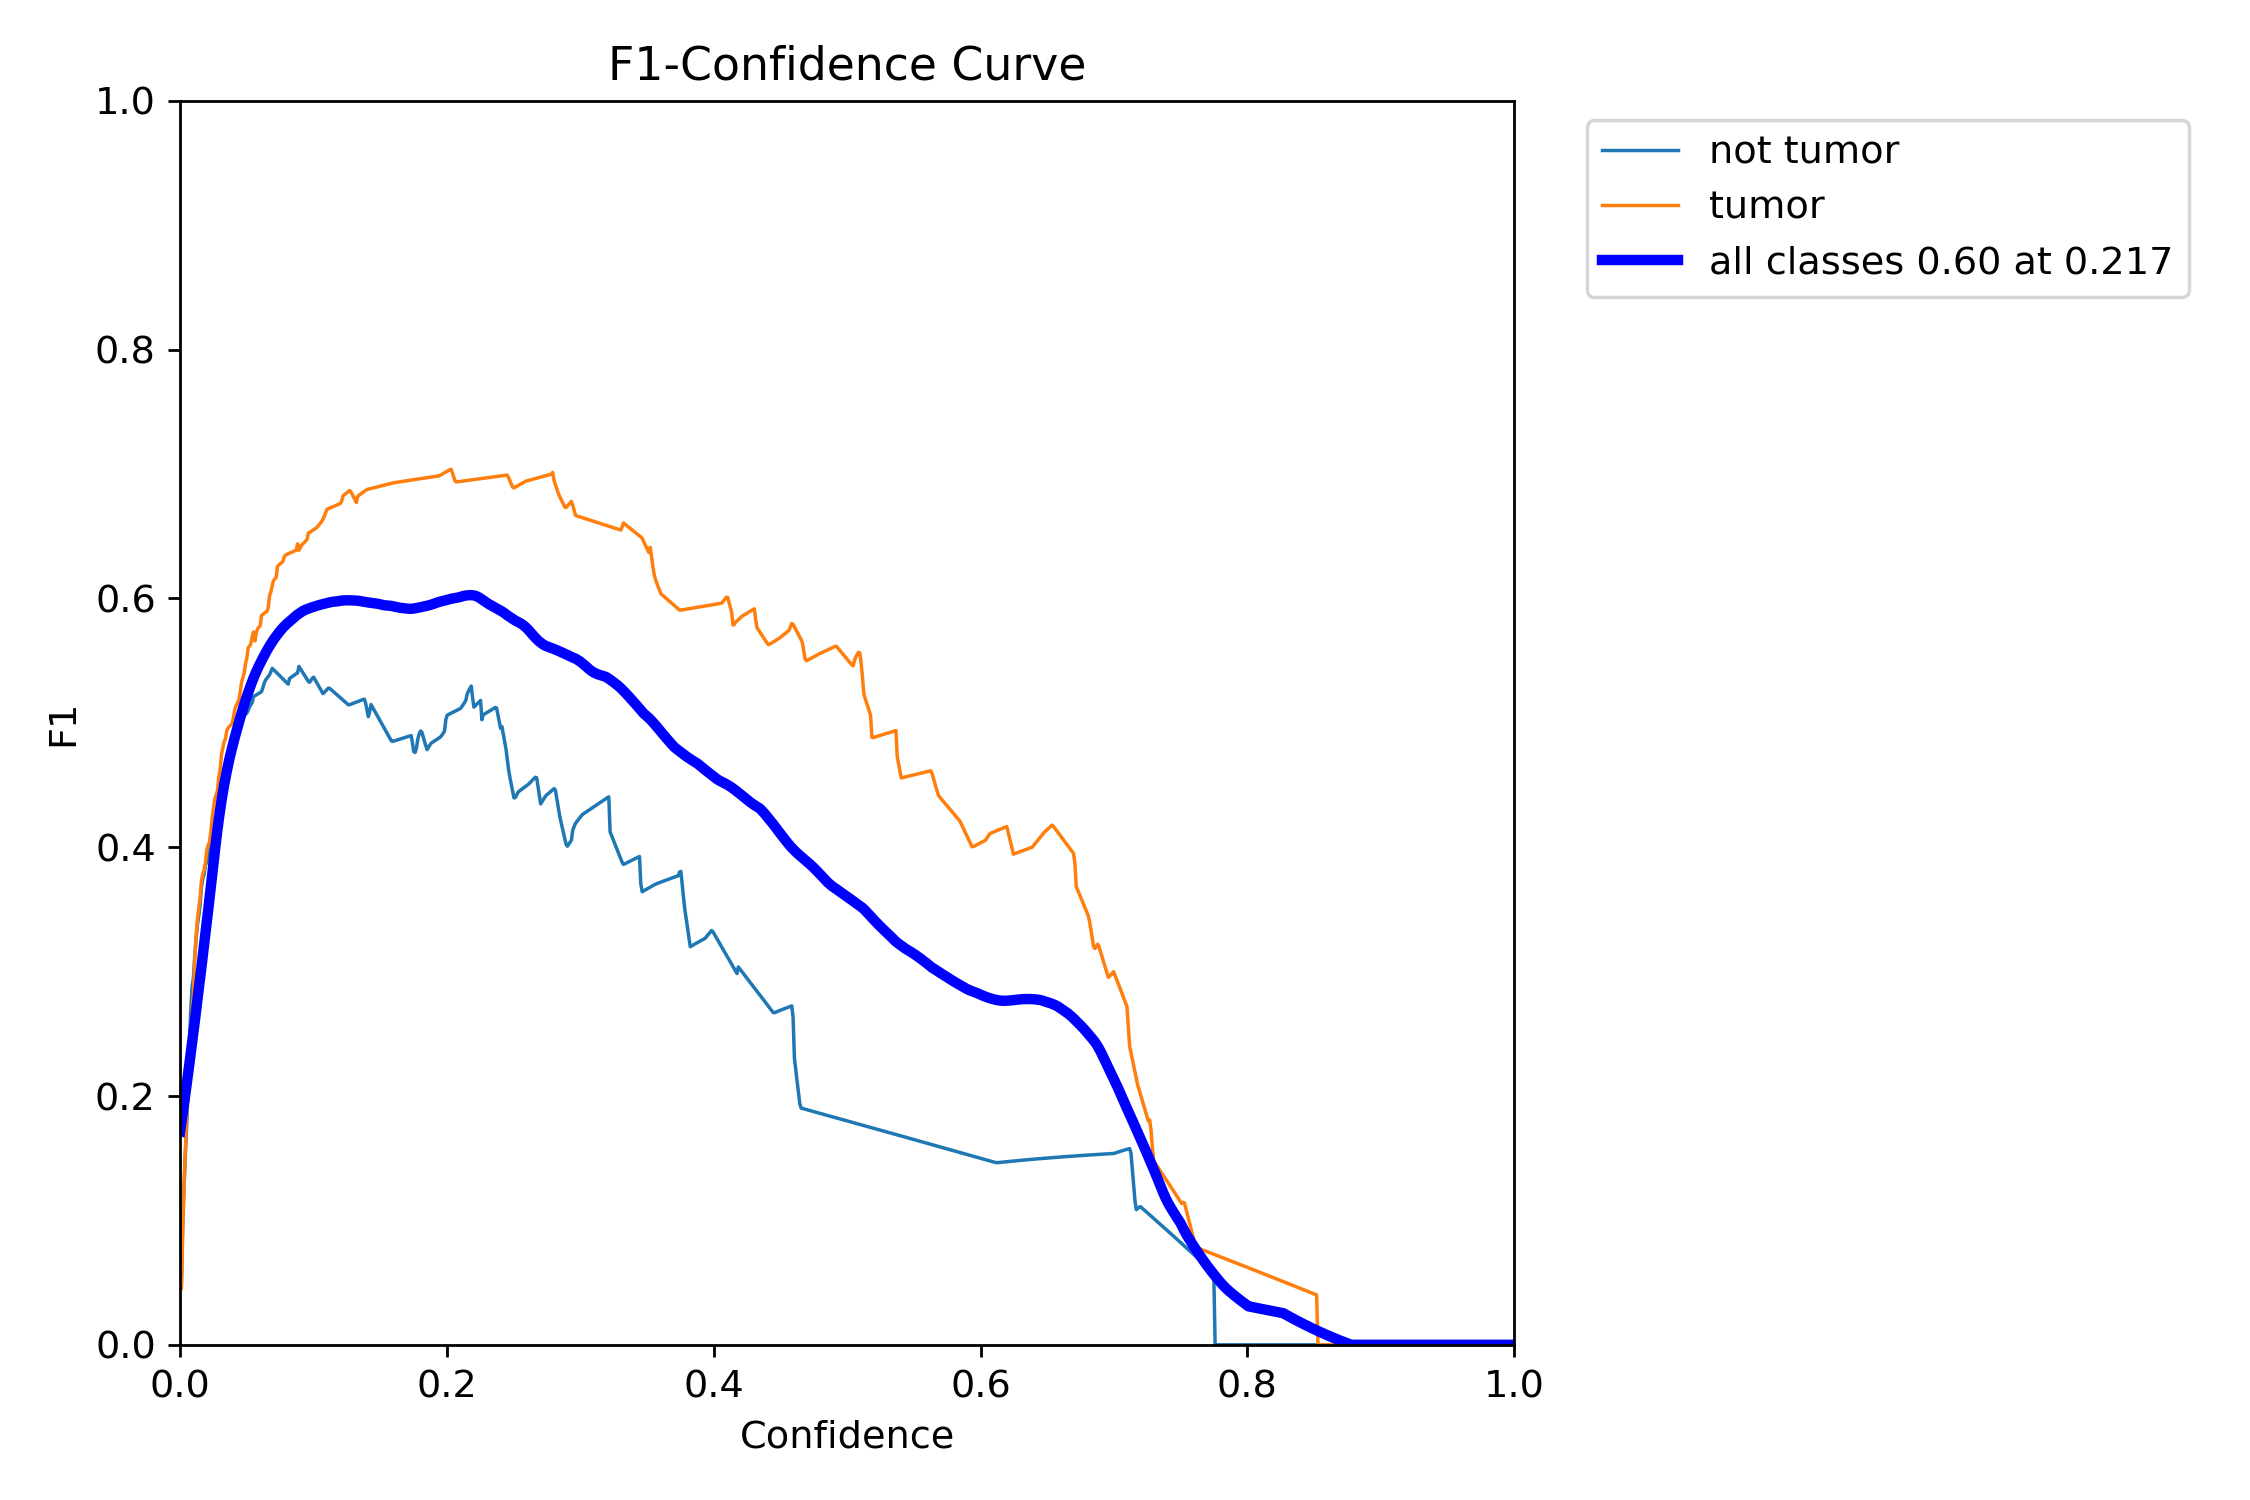

In [20]:
display(Image(filename='yolov5/runs/train/coronal/F1_curve.png'))


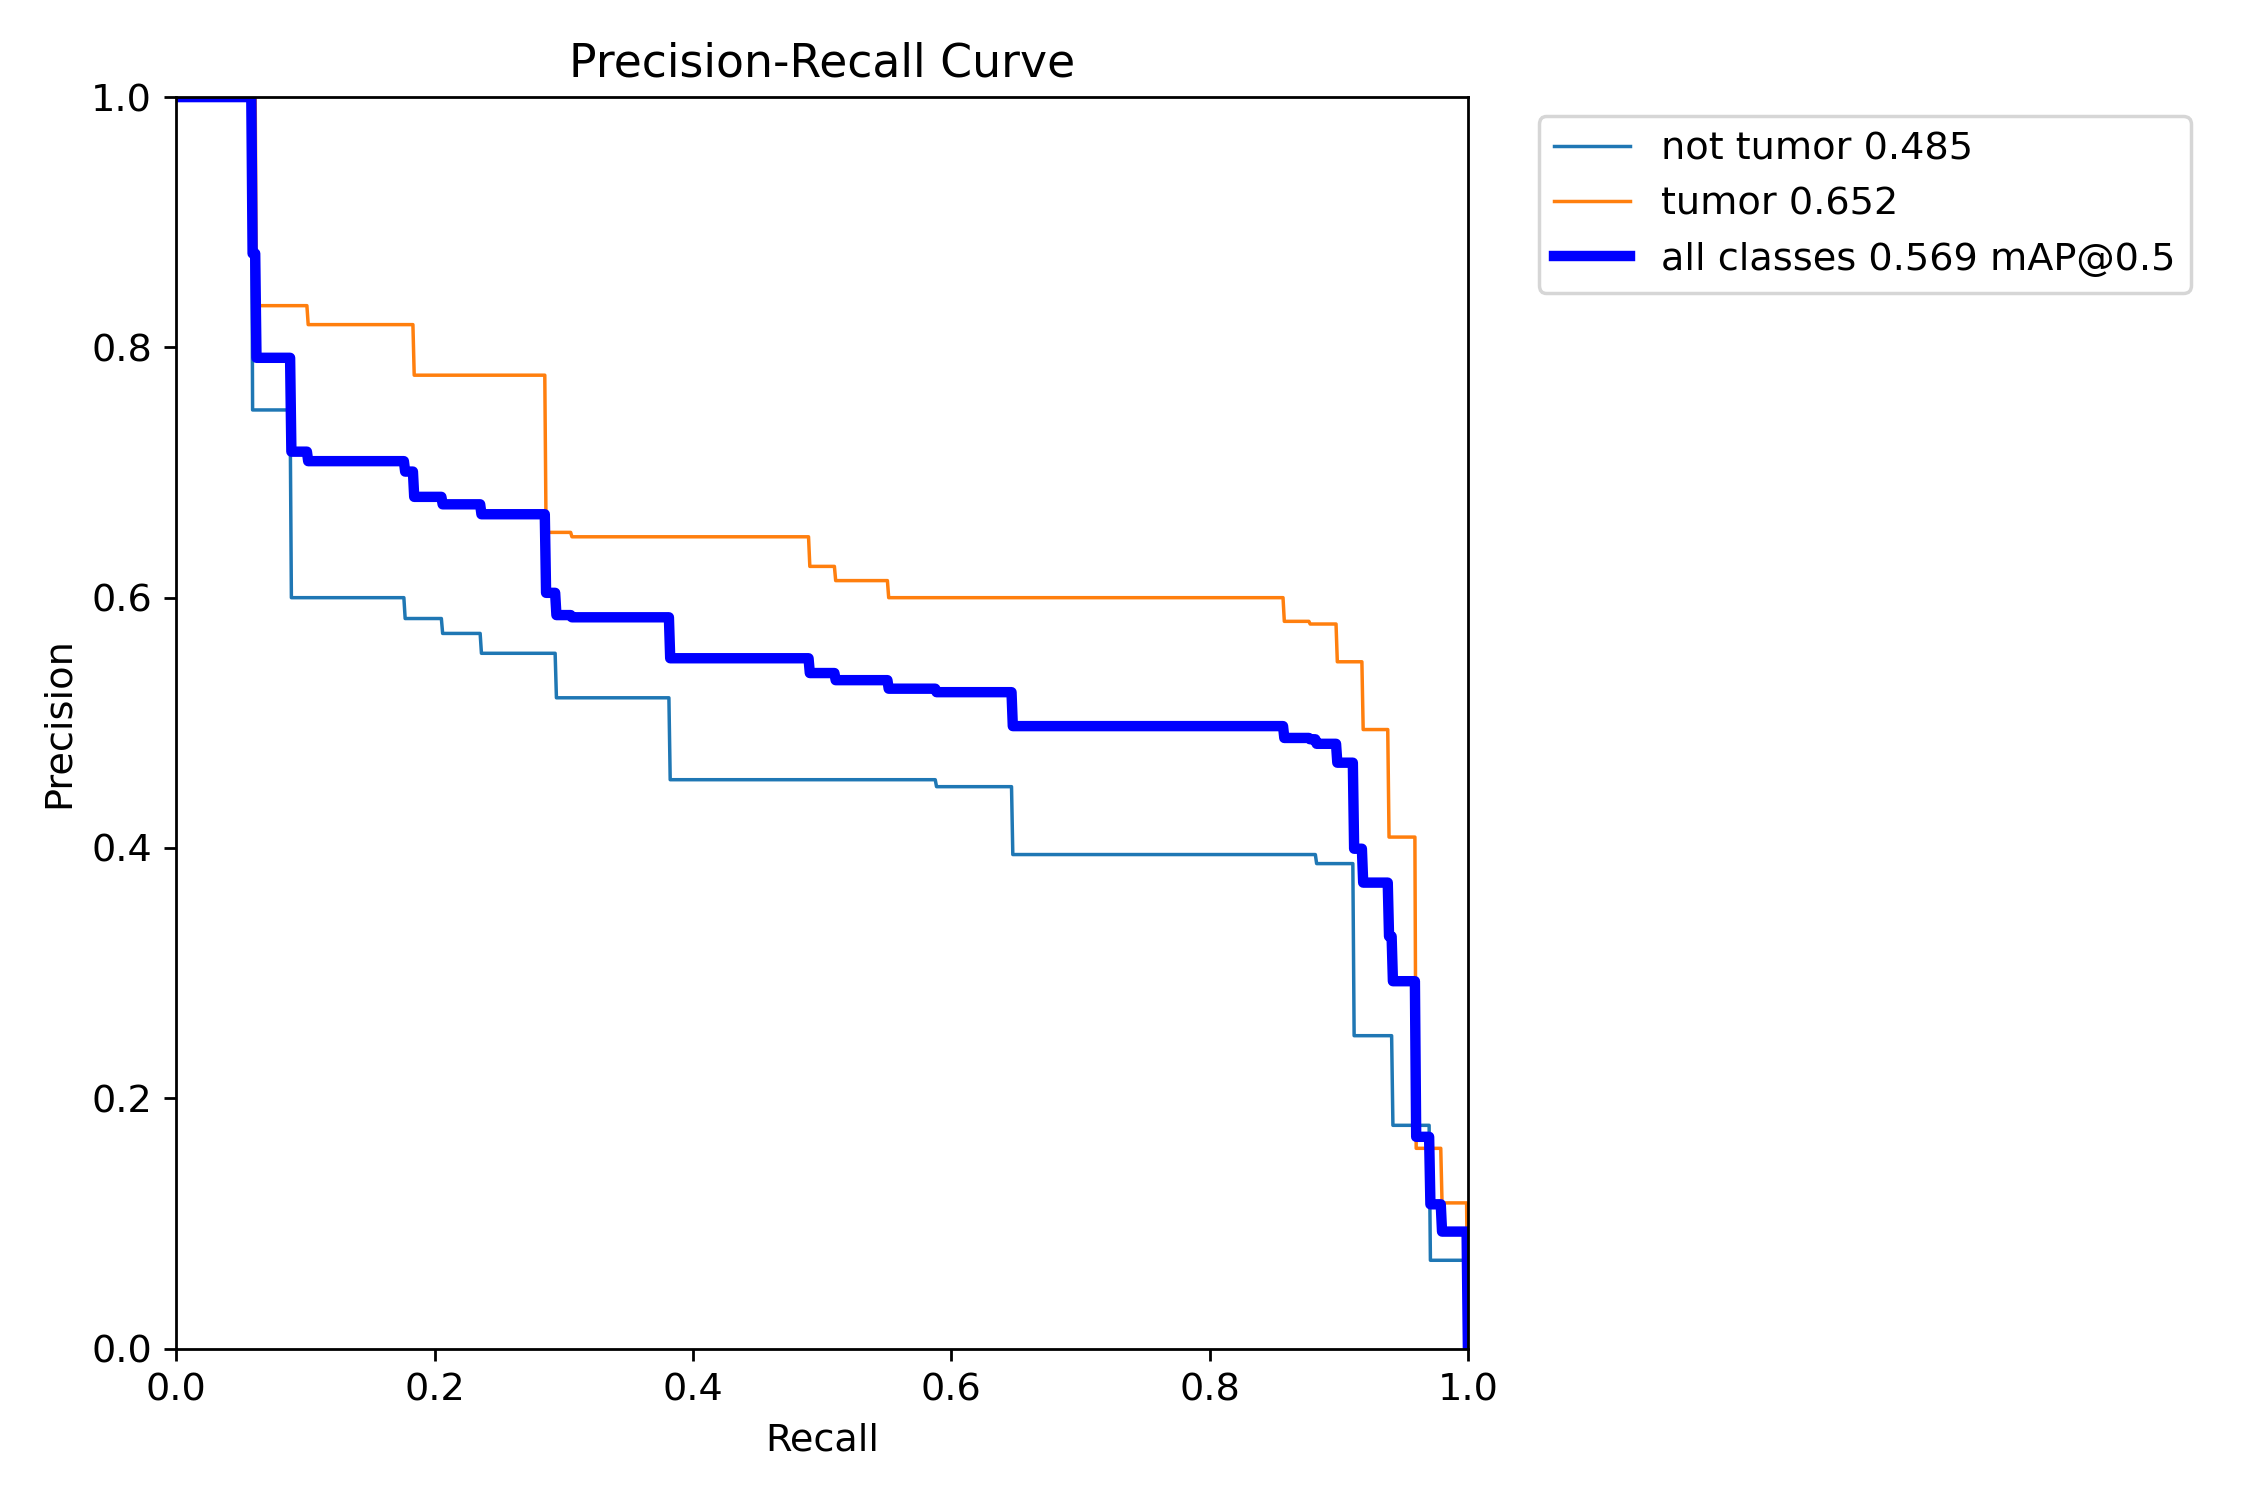

In [21]:
display(Image(filename='yolov5/runs/train/coronal/PR_curve.png'))

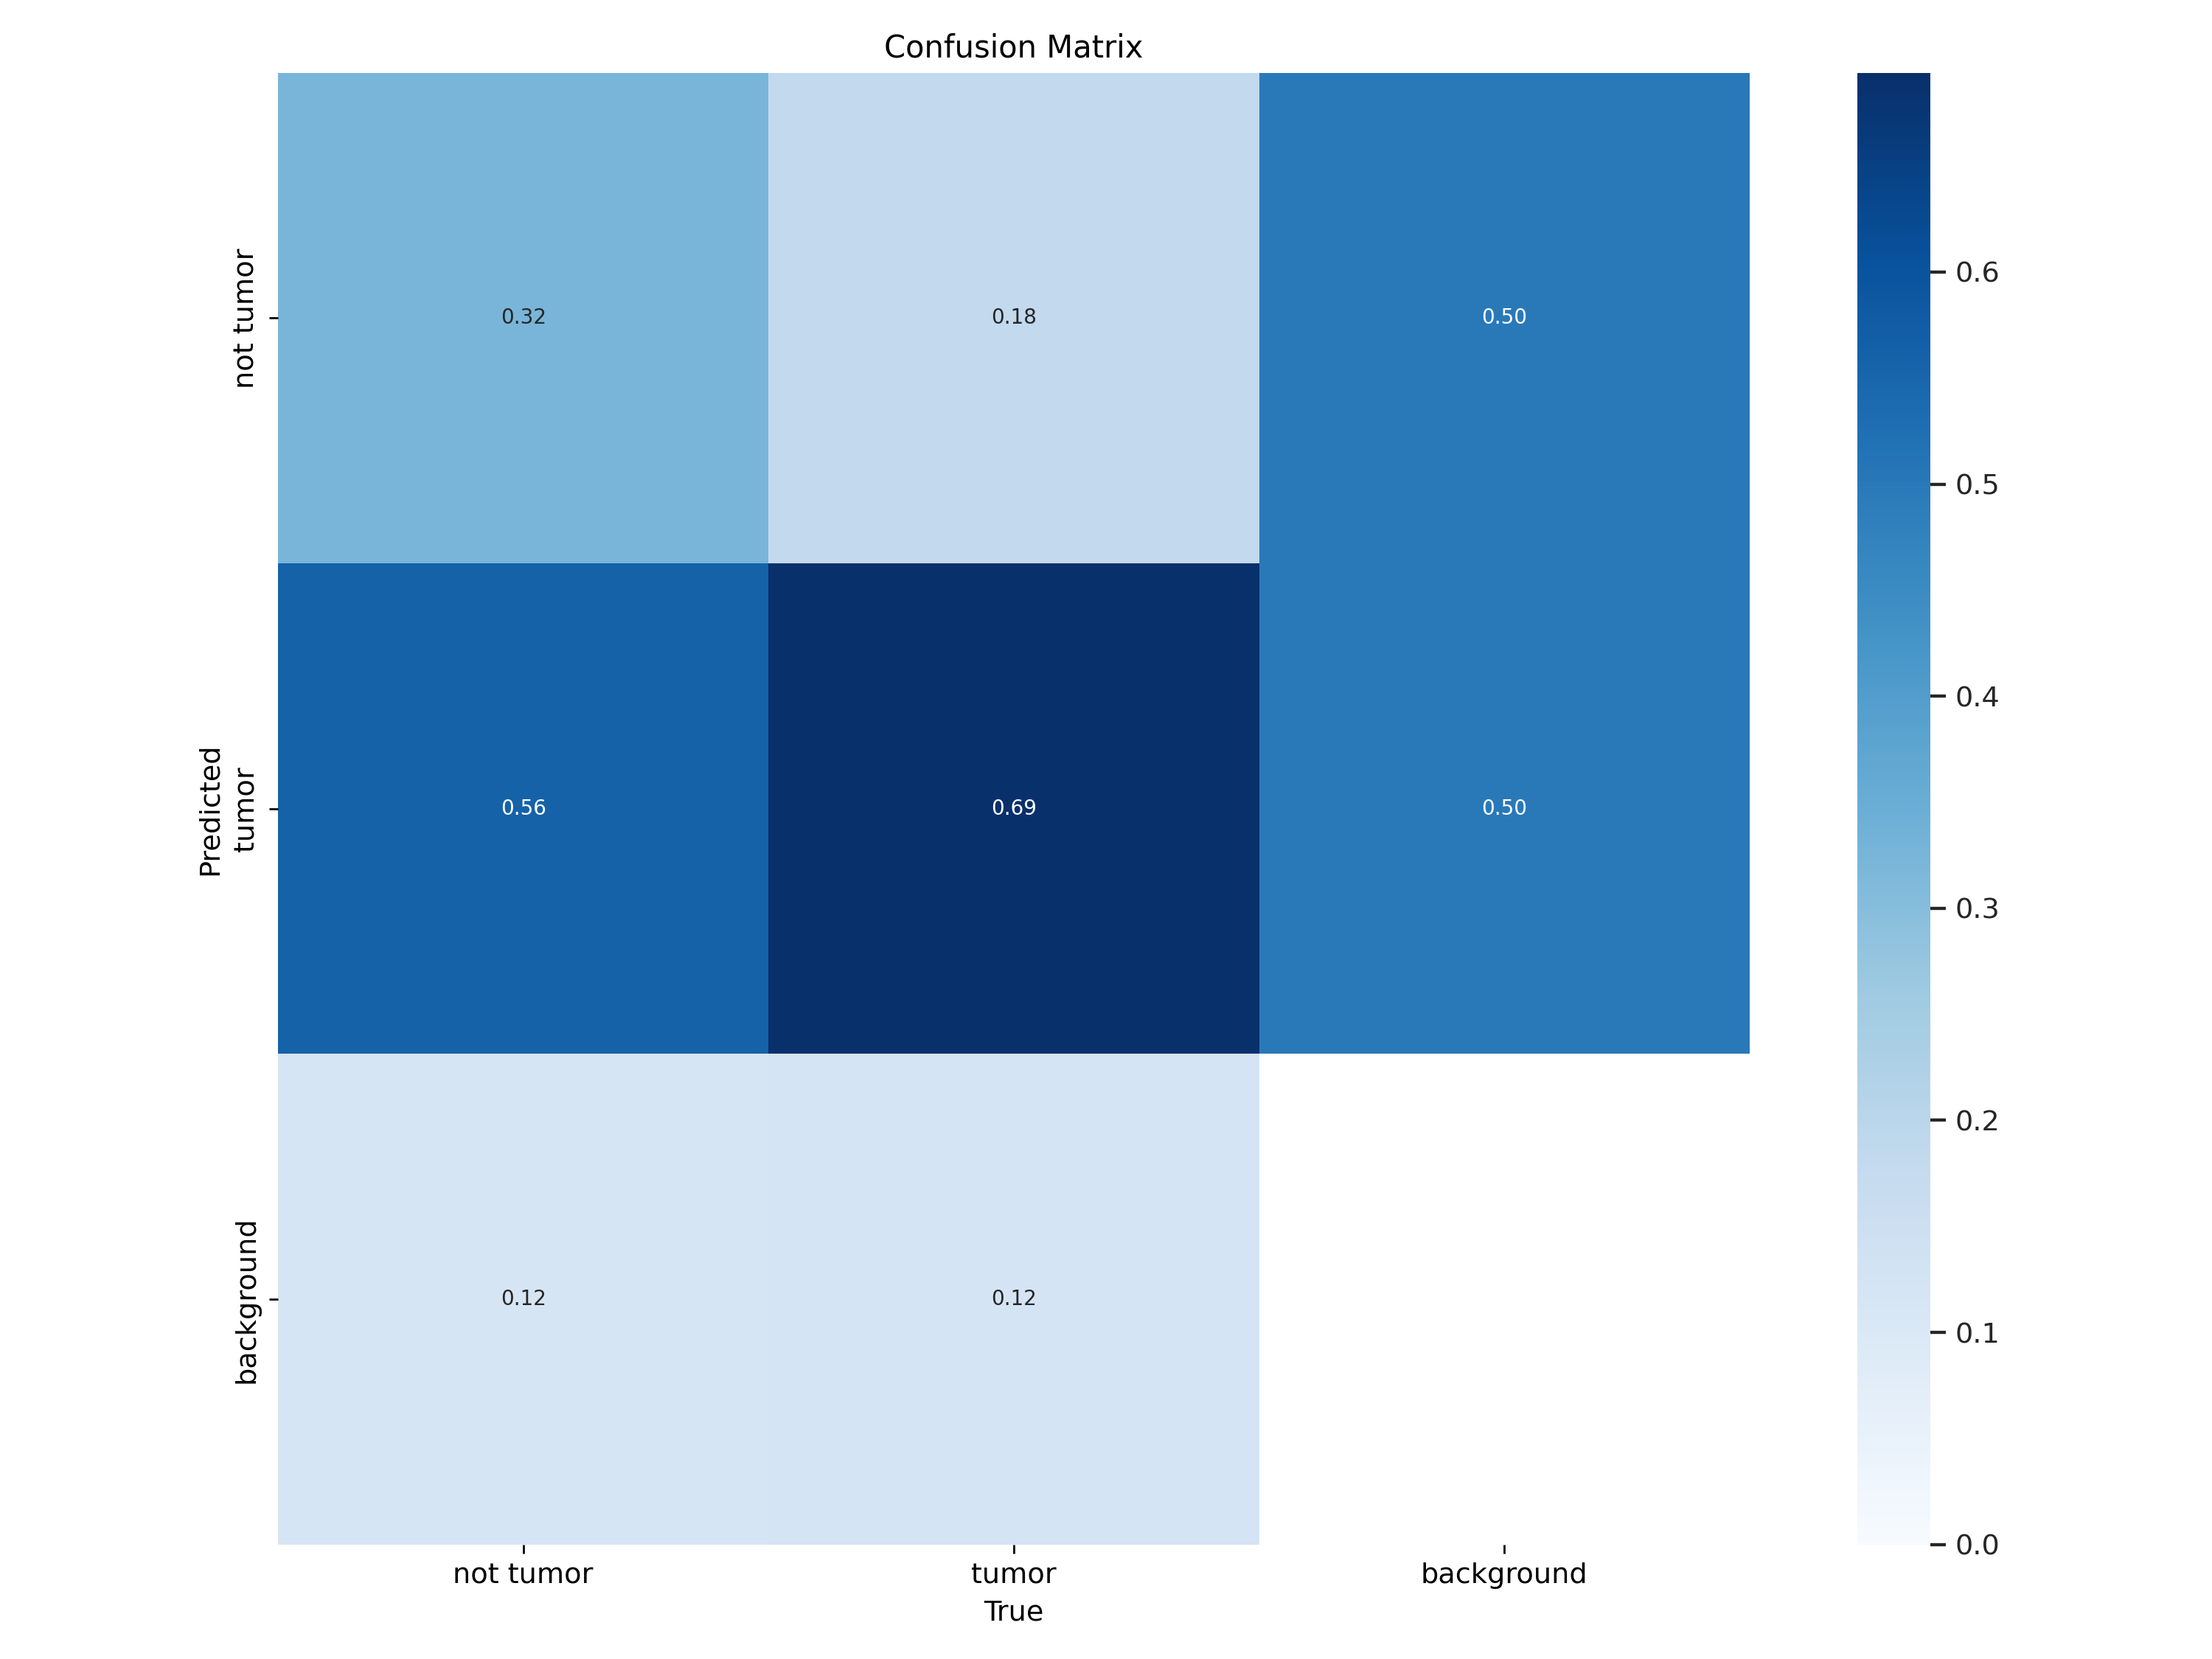

In [22]:
display(Image(filename='yolov5/runs/train/coronal/confusion_matrix.png'))


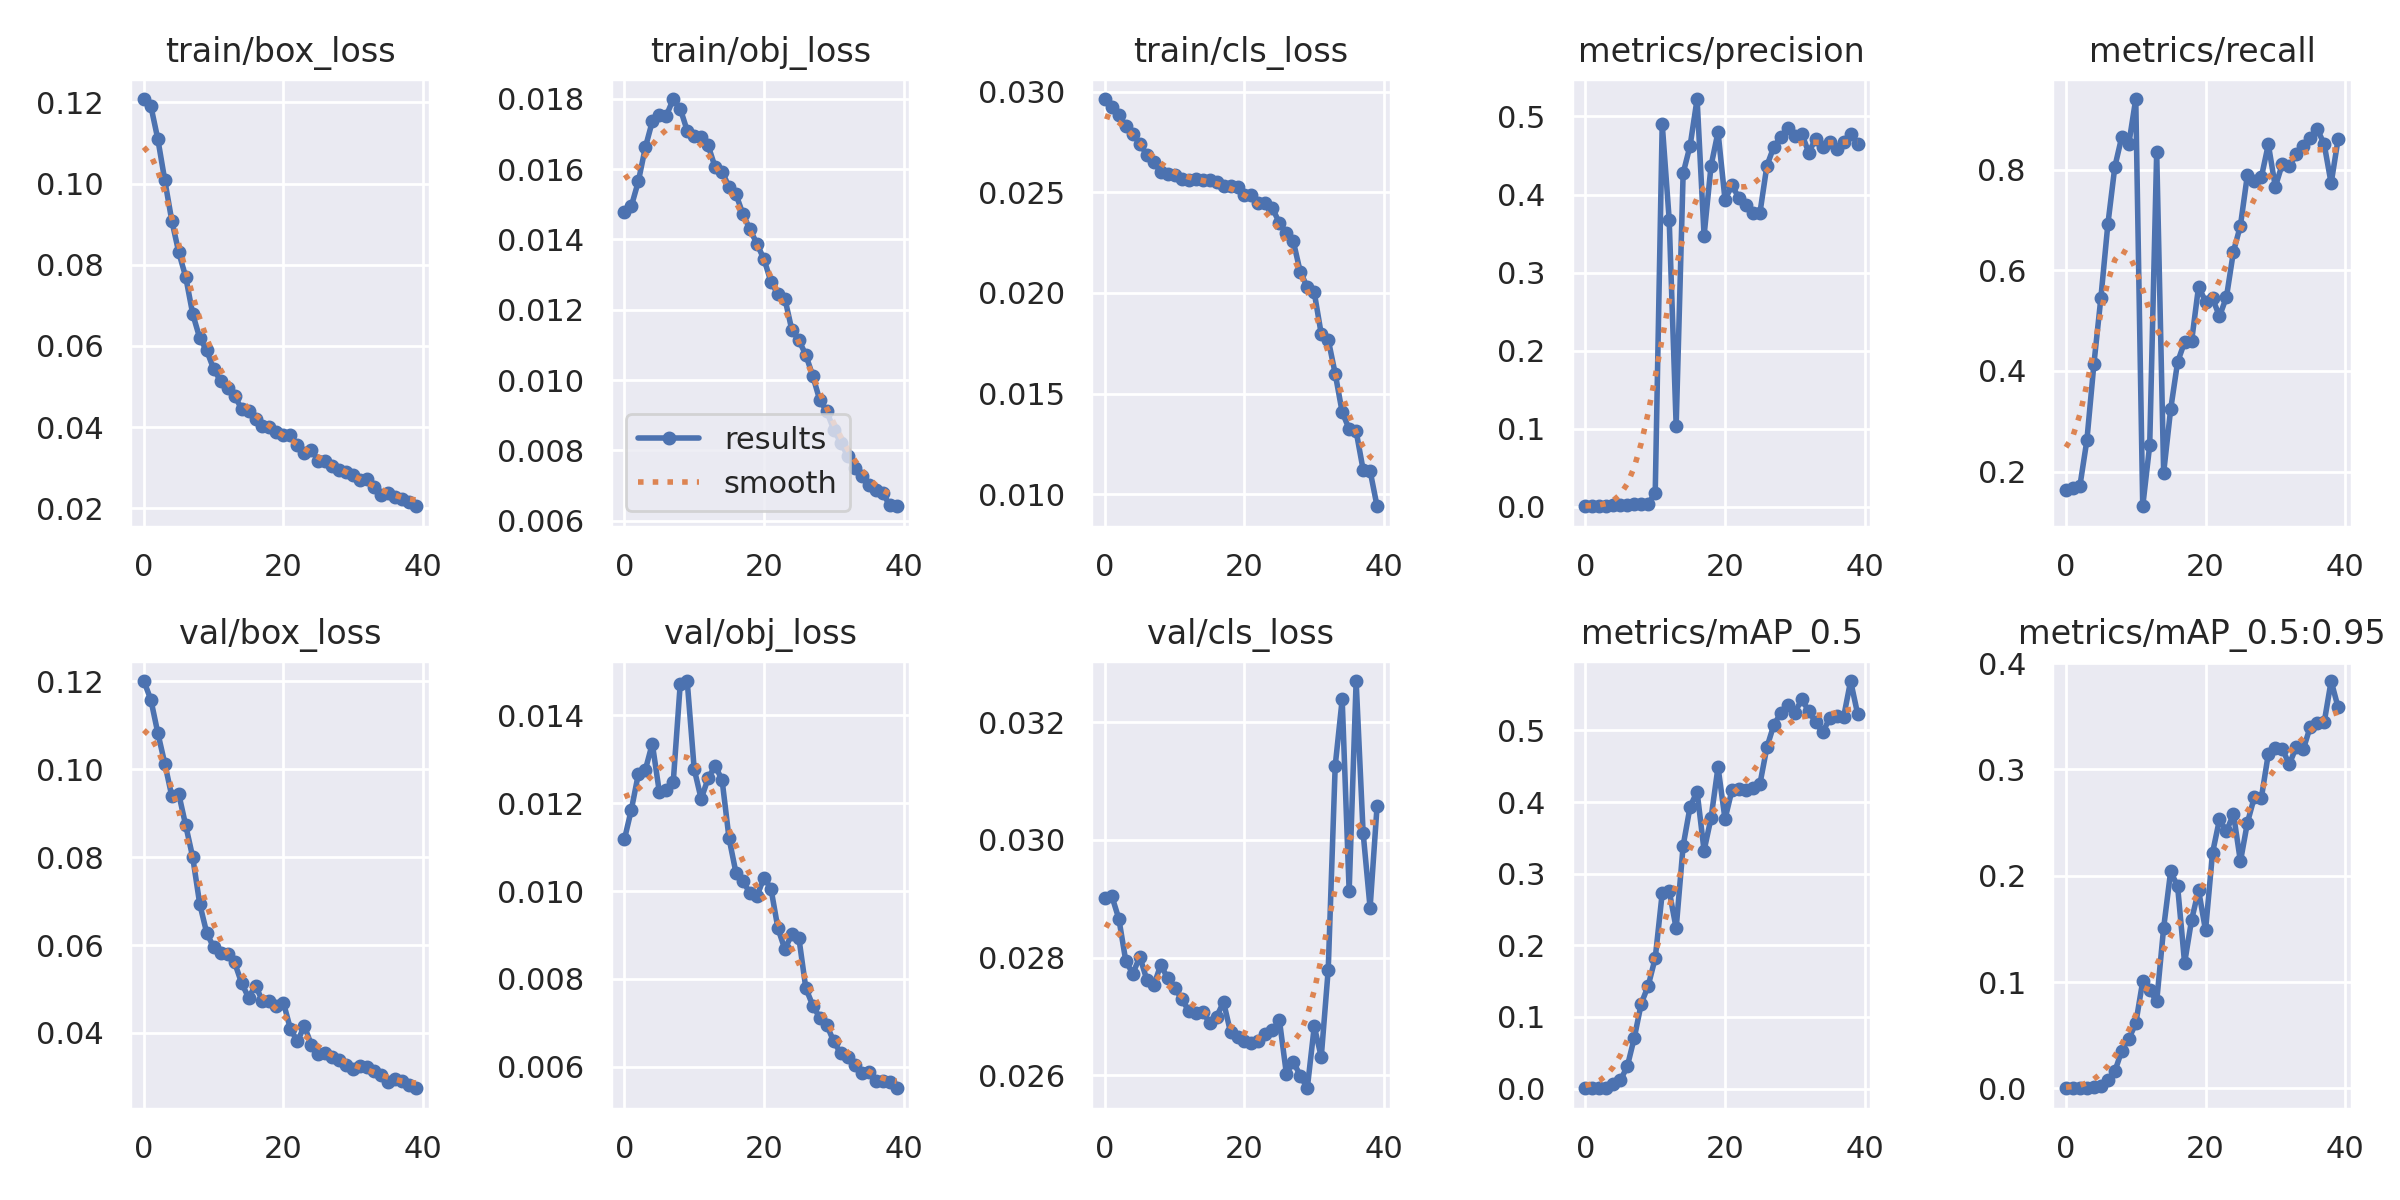

In [23]:
display(Image(filename='yolov5/runs/train/coronal/results.png'))

Saggital plane training

In [25]:
!python yolov5/train.py --img 480 --batch 80 --epochs 40 --data data/sagittal/sagittal.yaml --weights yolov5m.pt --device 0 --name sagittal --hyp ./data/augmentation.yaml
shutil.copyfile('yolov5/runs/train/sagittal/weights/best.pt', f'{output_folder}/tumor_detector_sagittal.pt')

2024-04-06 10:13:28.812341: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-06 10:13:28.812399: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-06 10:13:28.814391: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5m.pt, cfg=, data=data/sagittal/sagittal.yaml, hyp=./data/augmentation.yaml, epochs=40, batch_size=80, imgsz=480, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=yolov5/data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, sin

'output_models/tumor_detector_sagittal.pt'

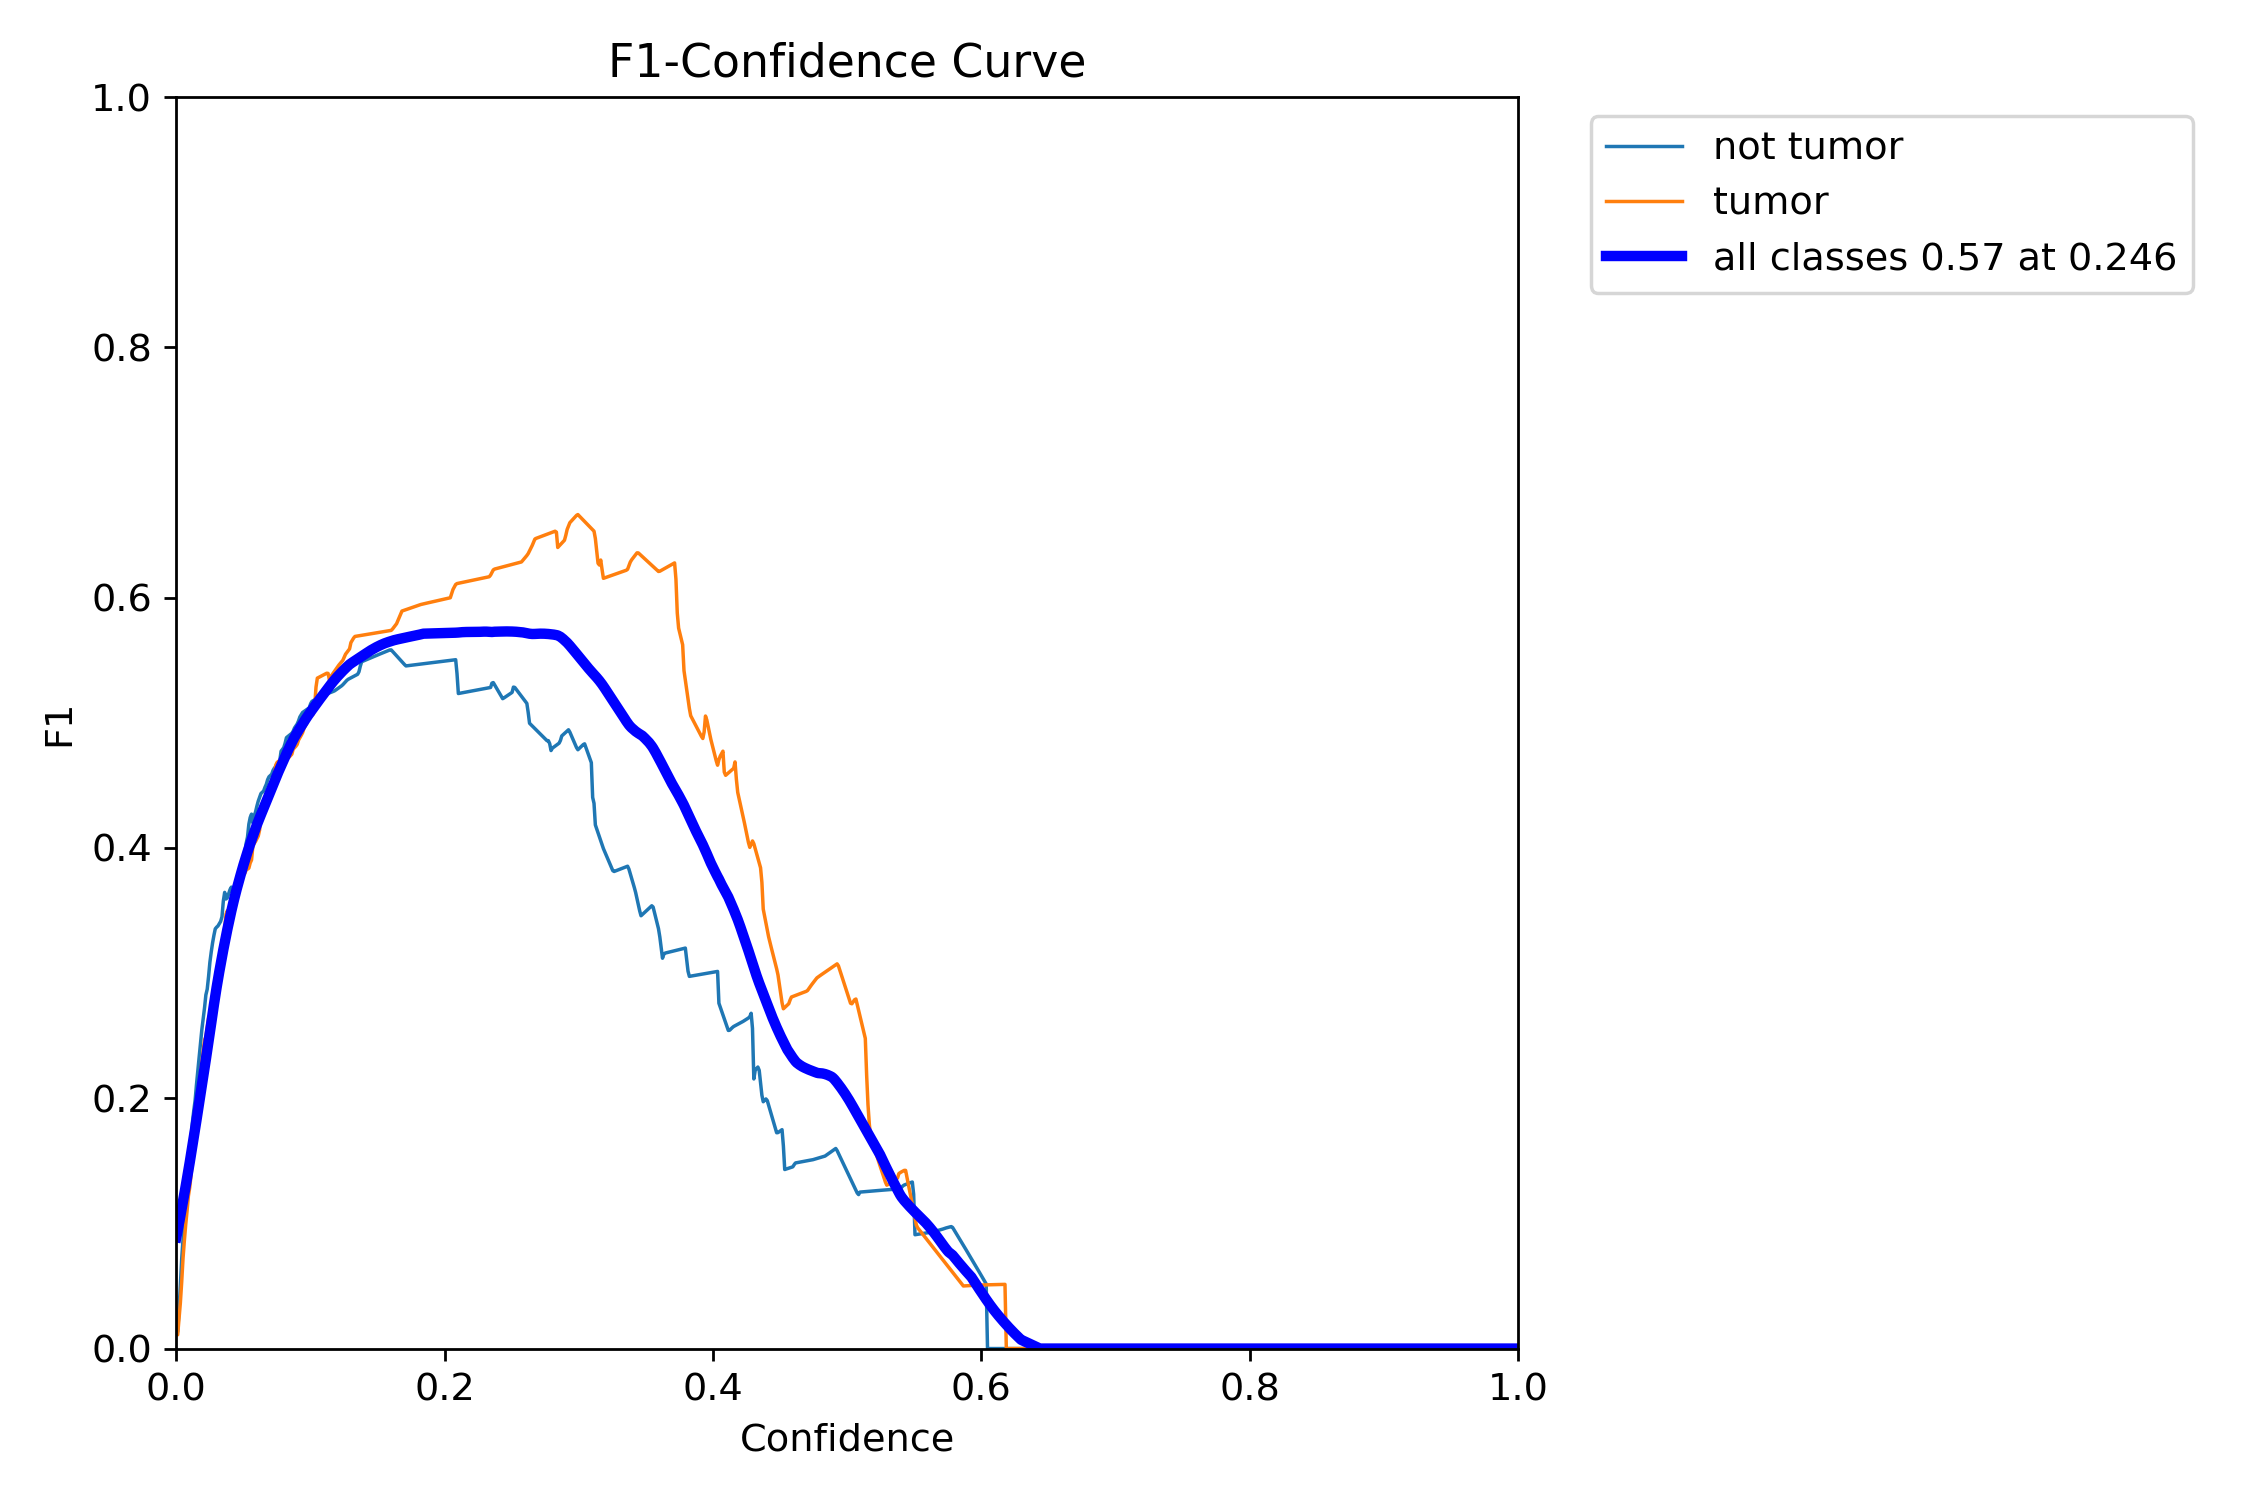

In [26]:
display(Image(filename='yolov5/runs/train/sagittal/F1_curve.png'))

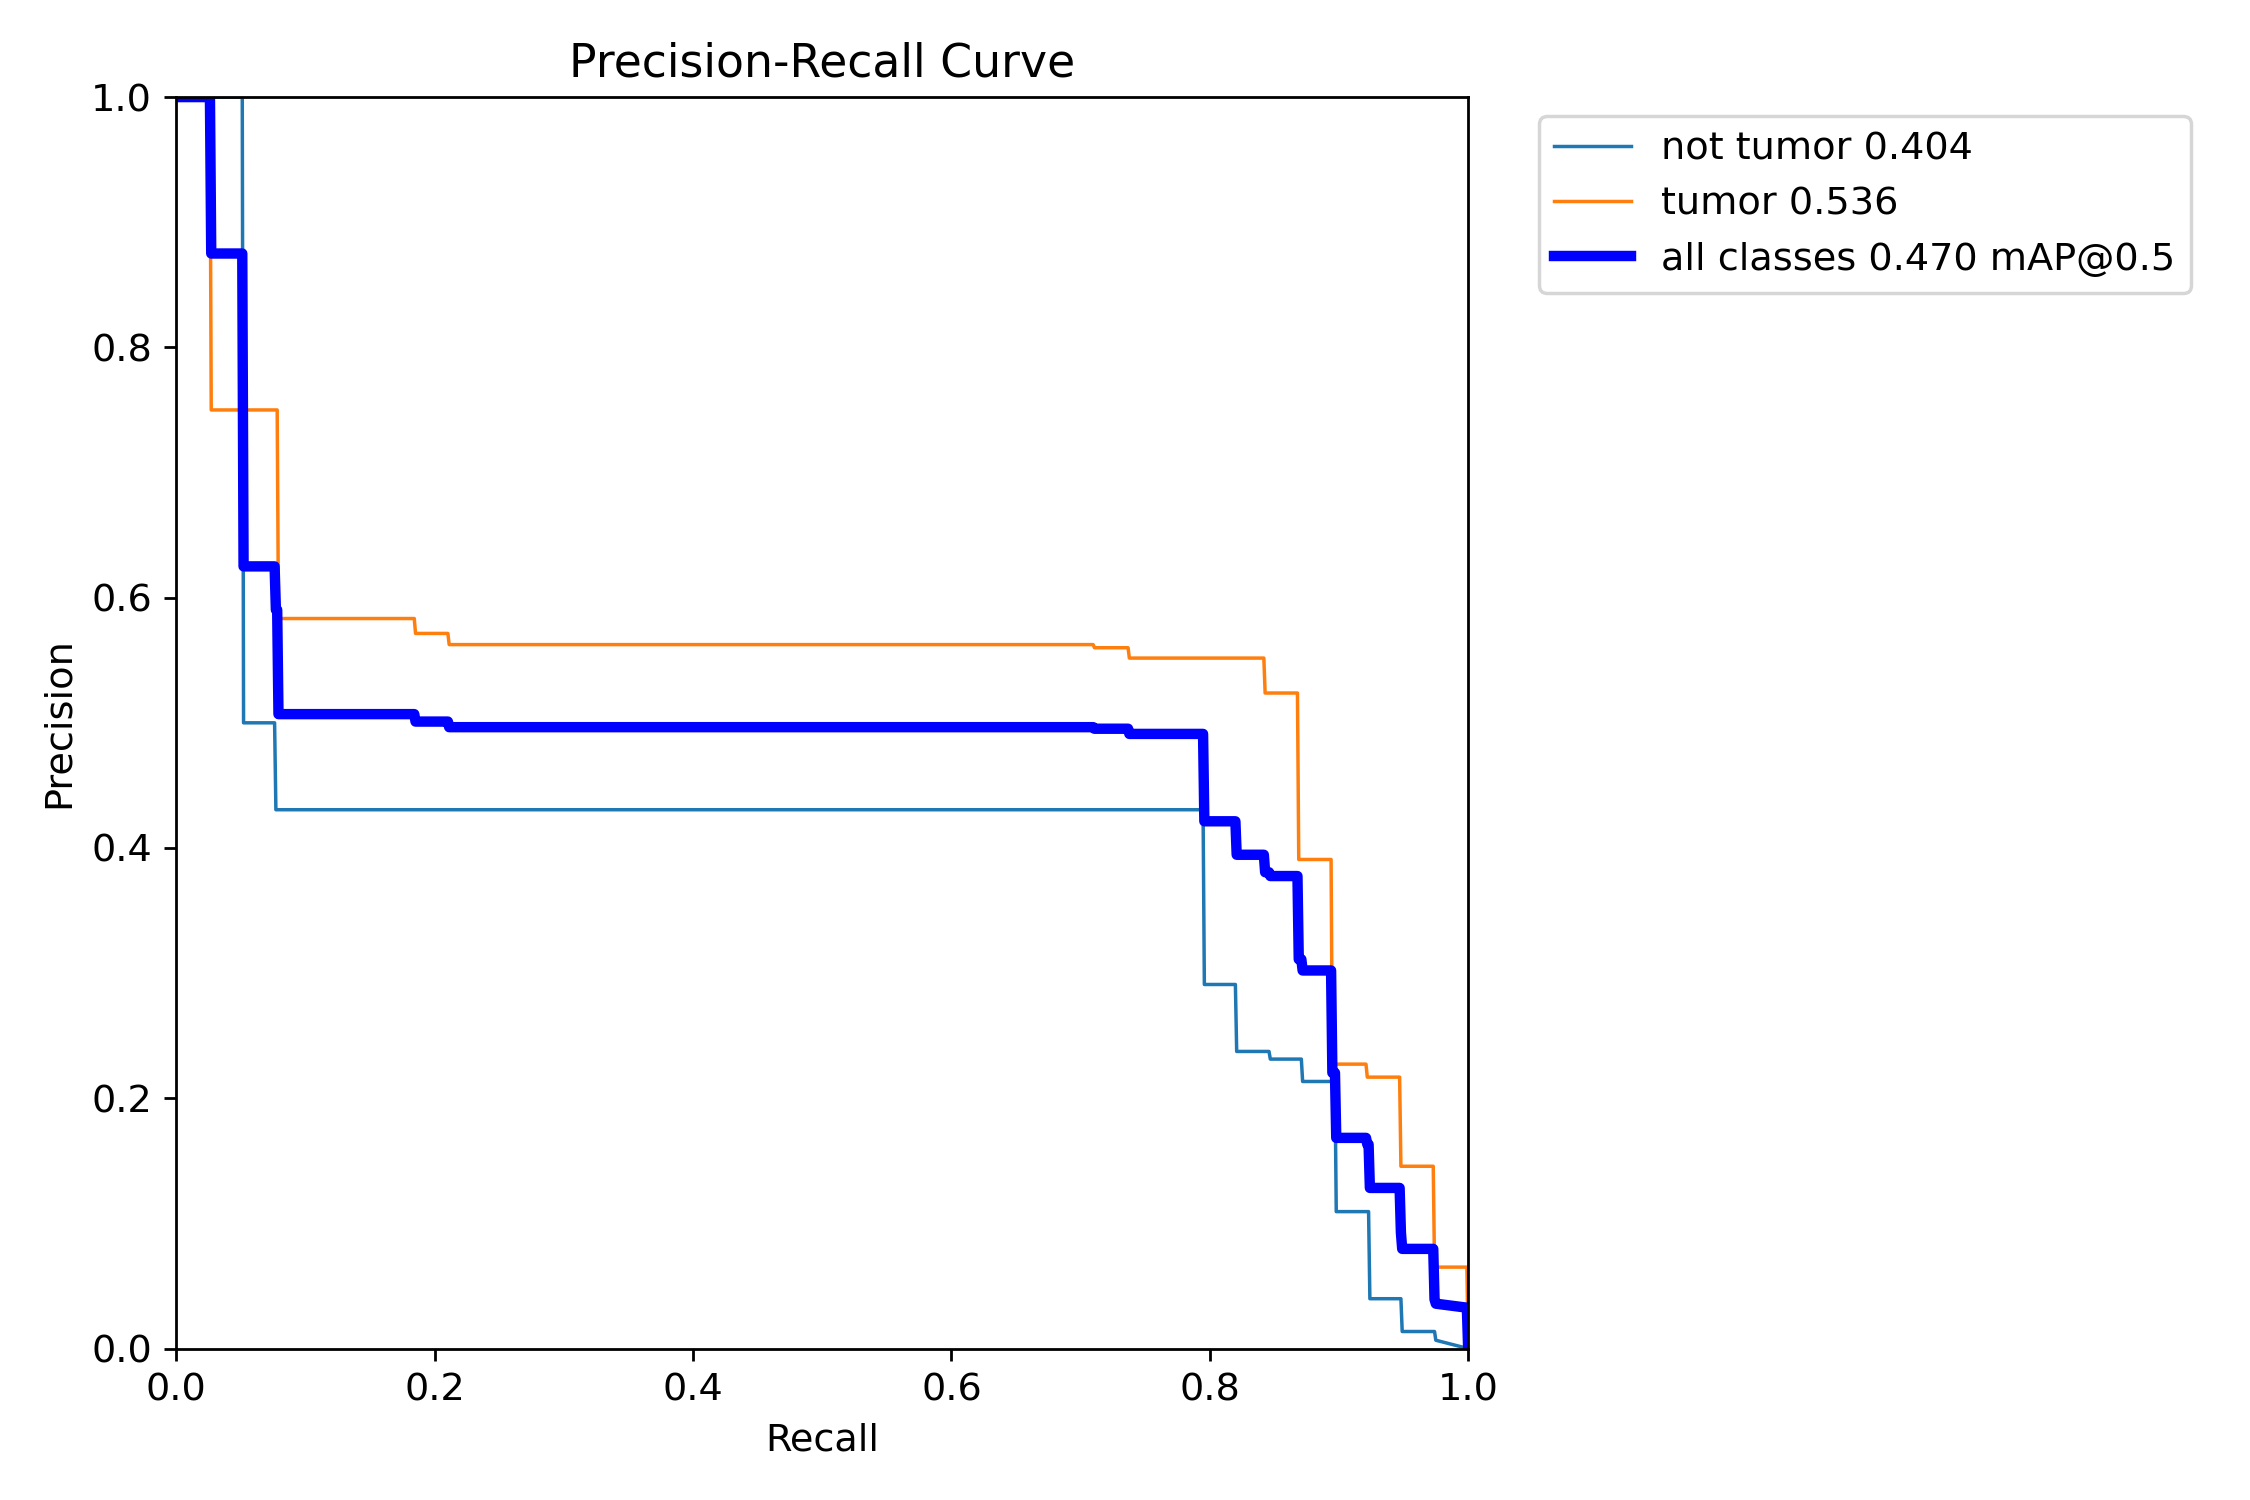

In [27]:
display(Image(filename='yolov5/runs/train/sagittal/PR_curve.png'))

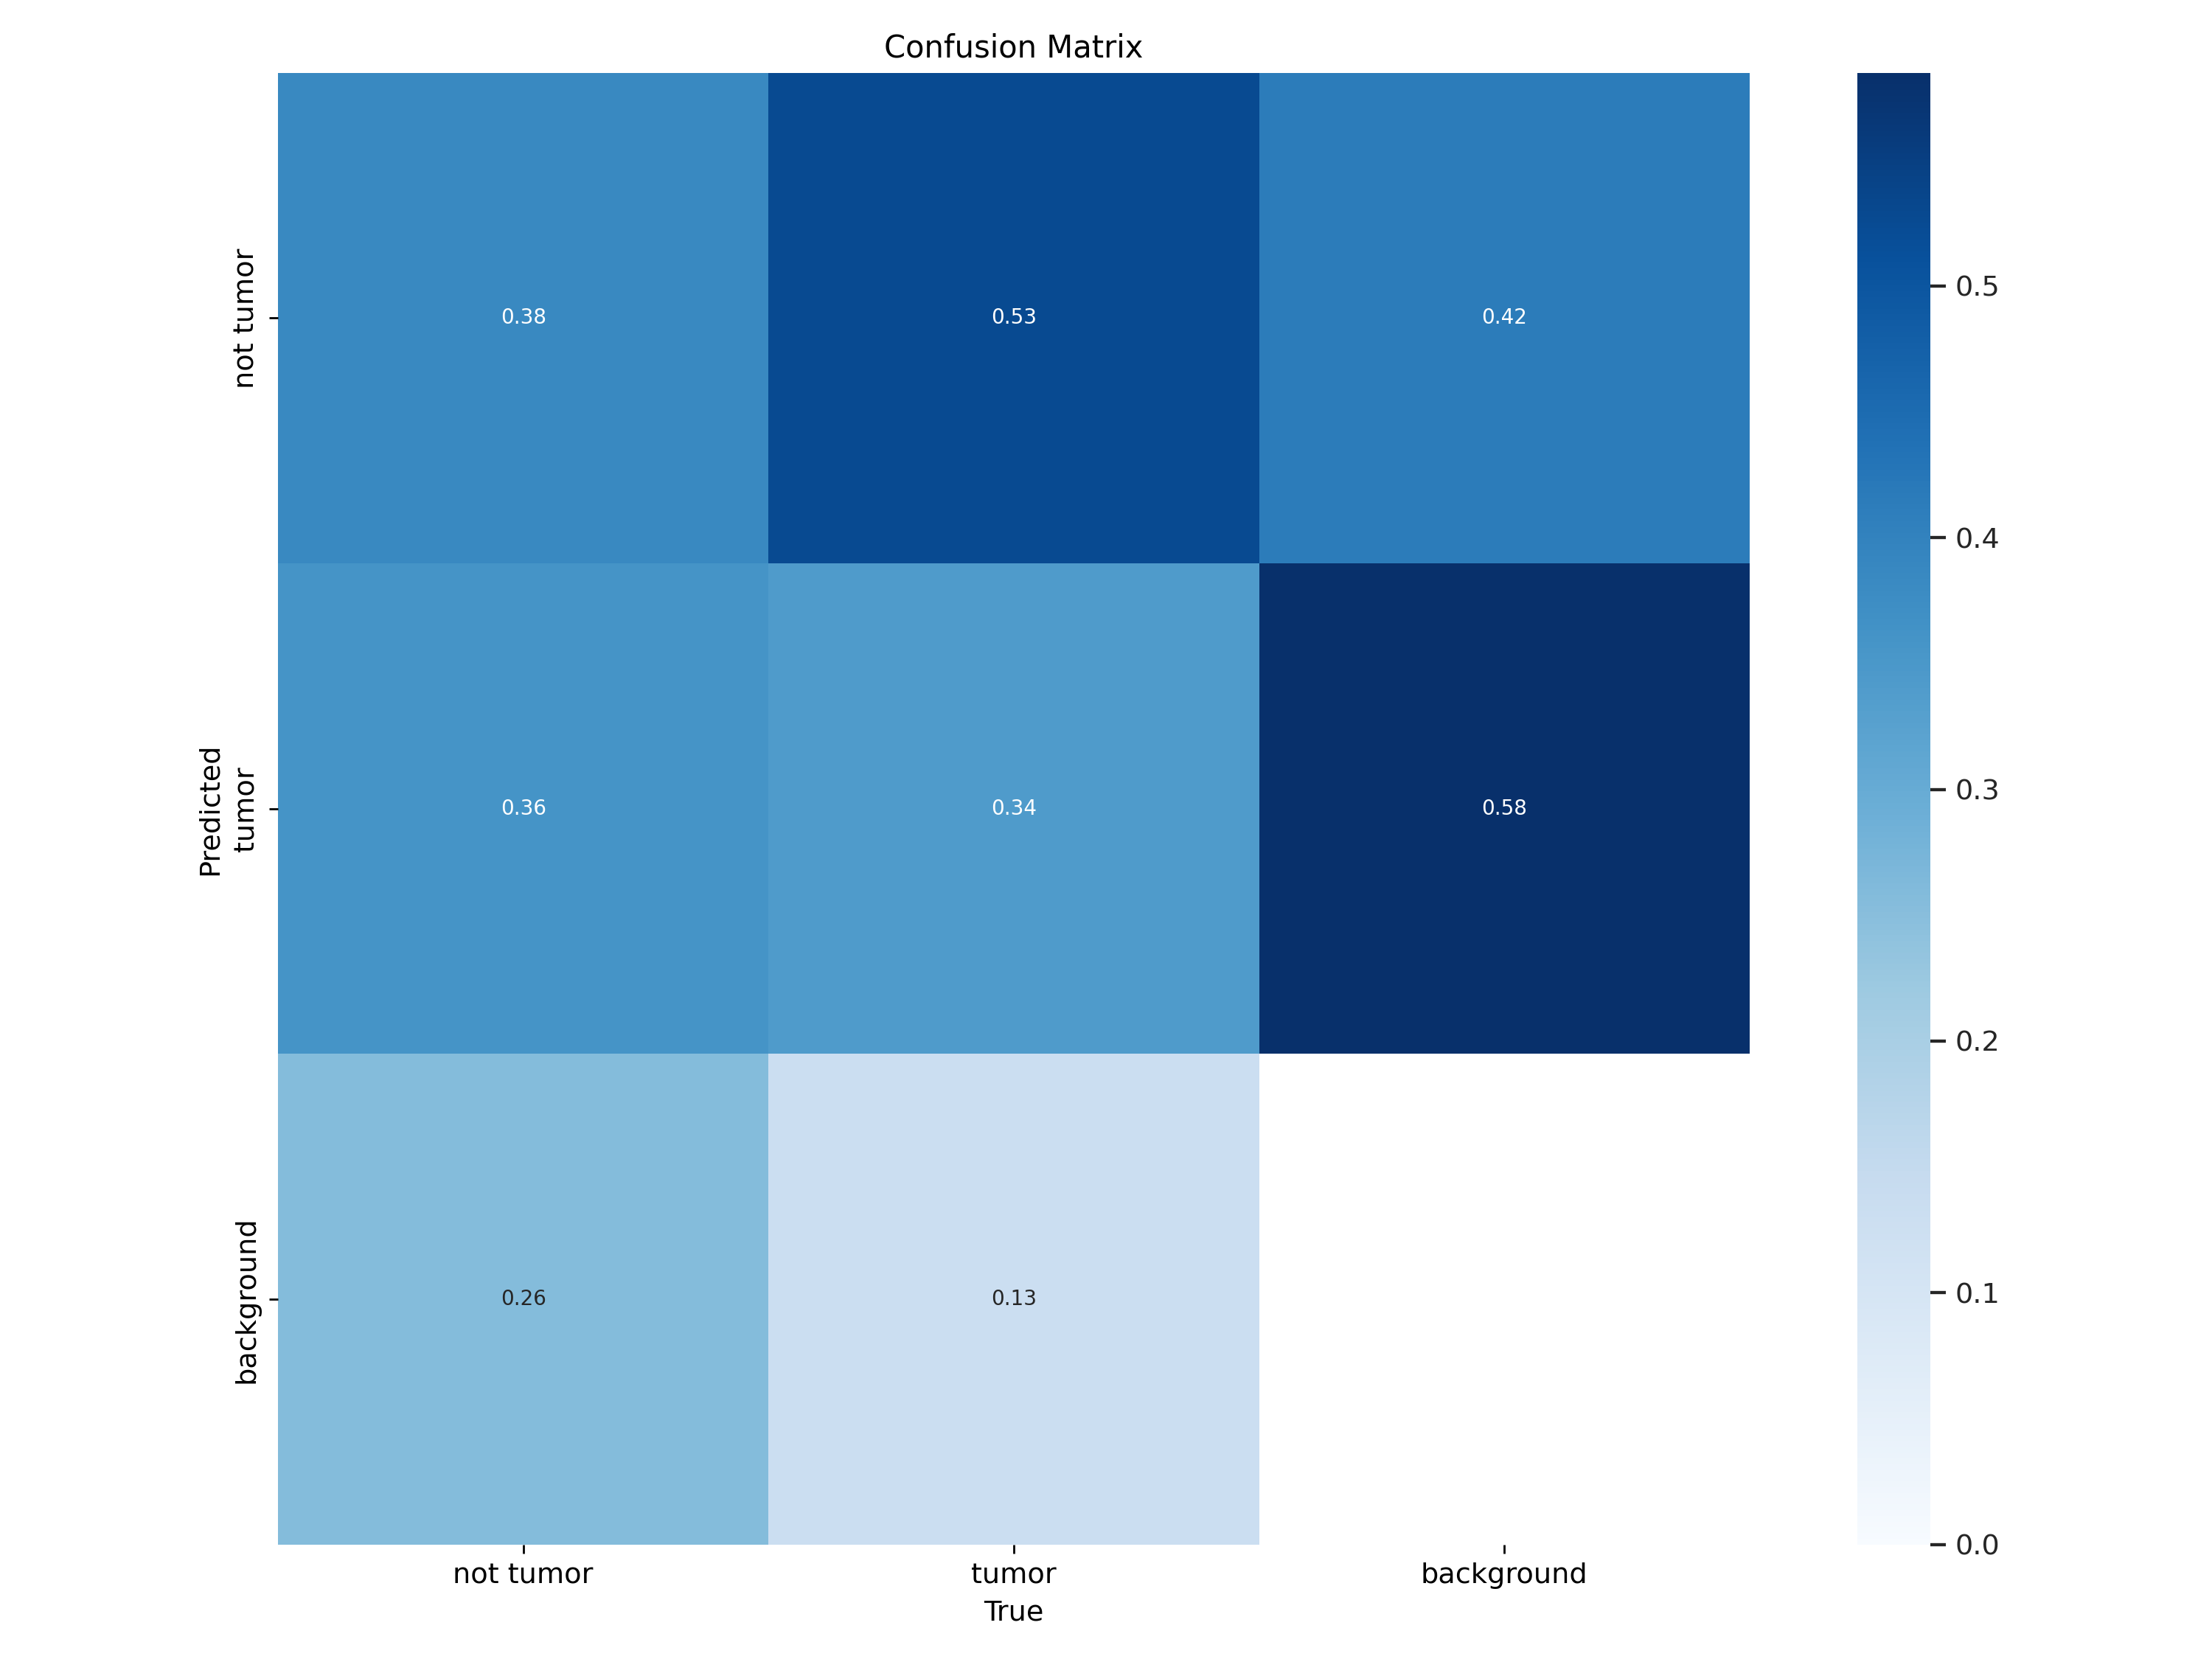

In [28]:
display(Image(filename='yolov5/runs/train/sagittal/confusion_matrix.png'))

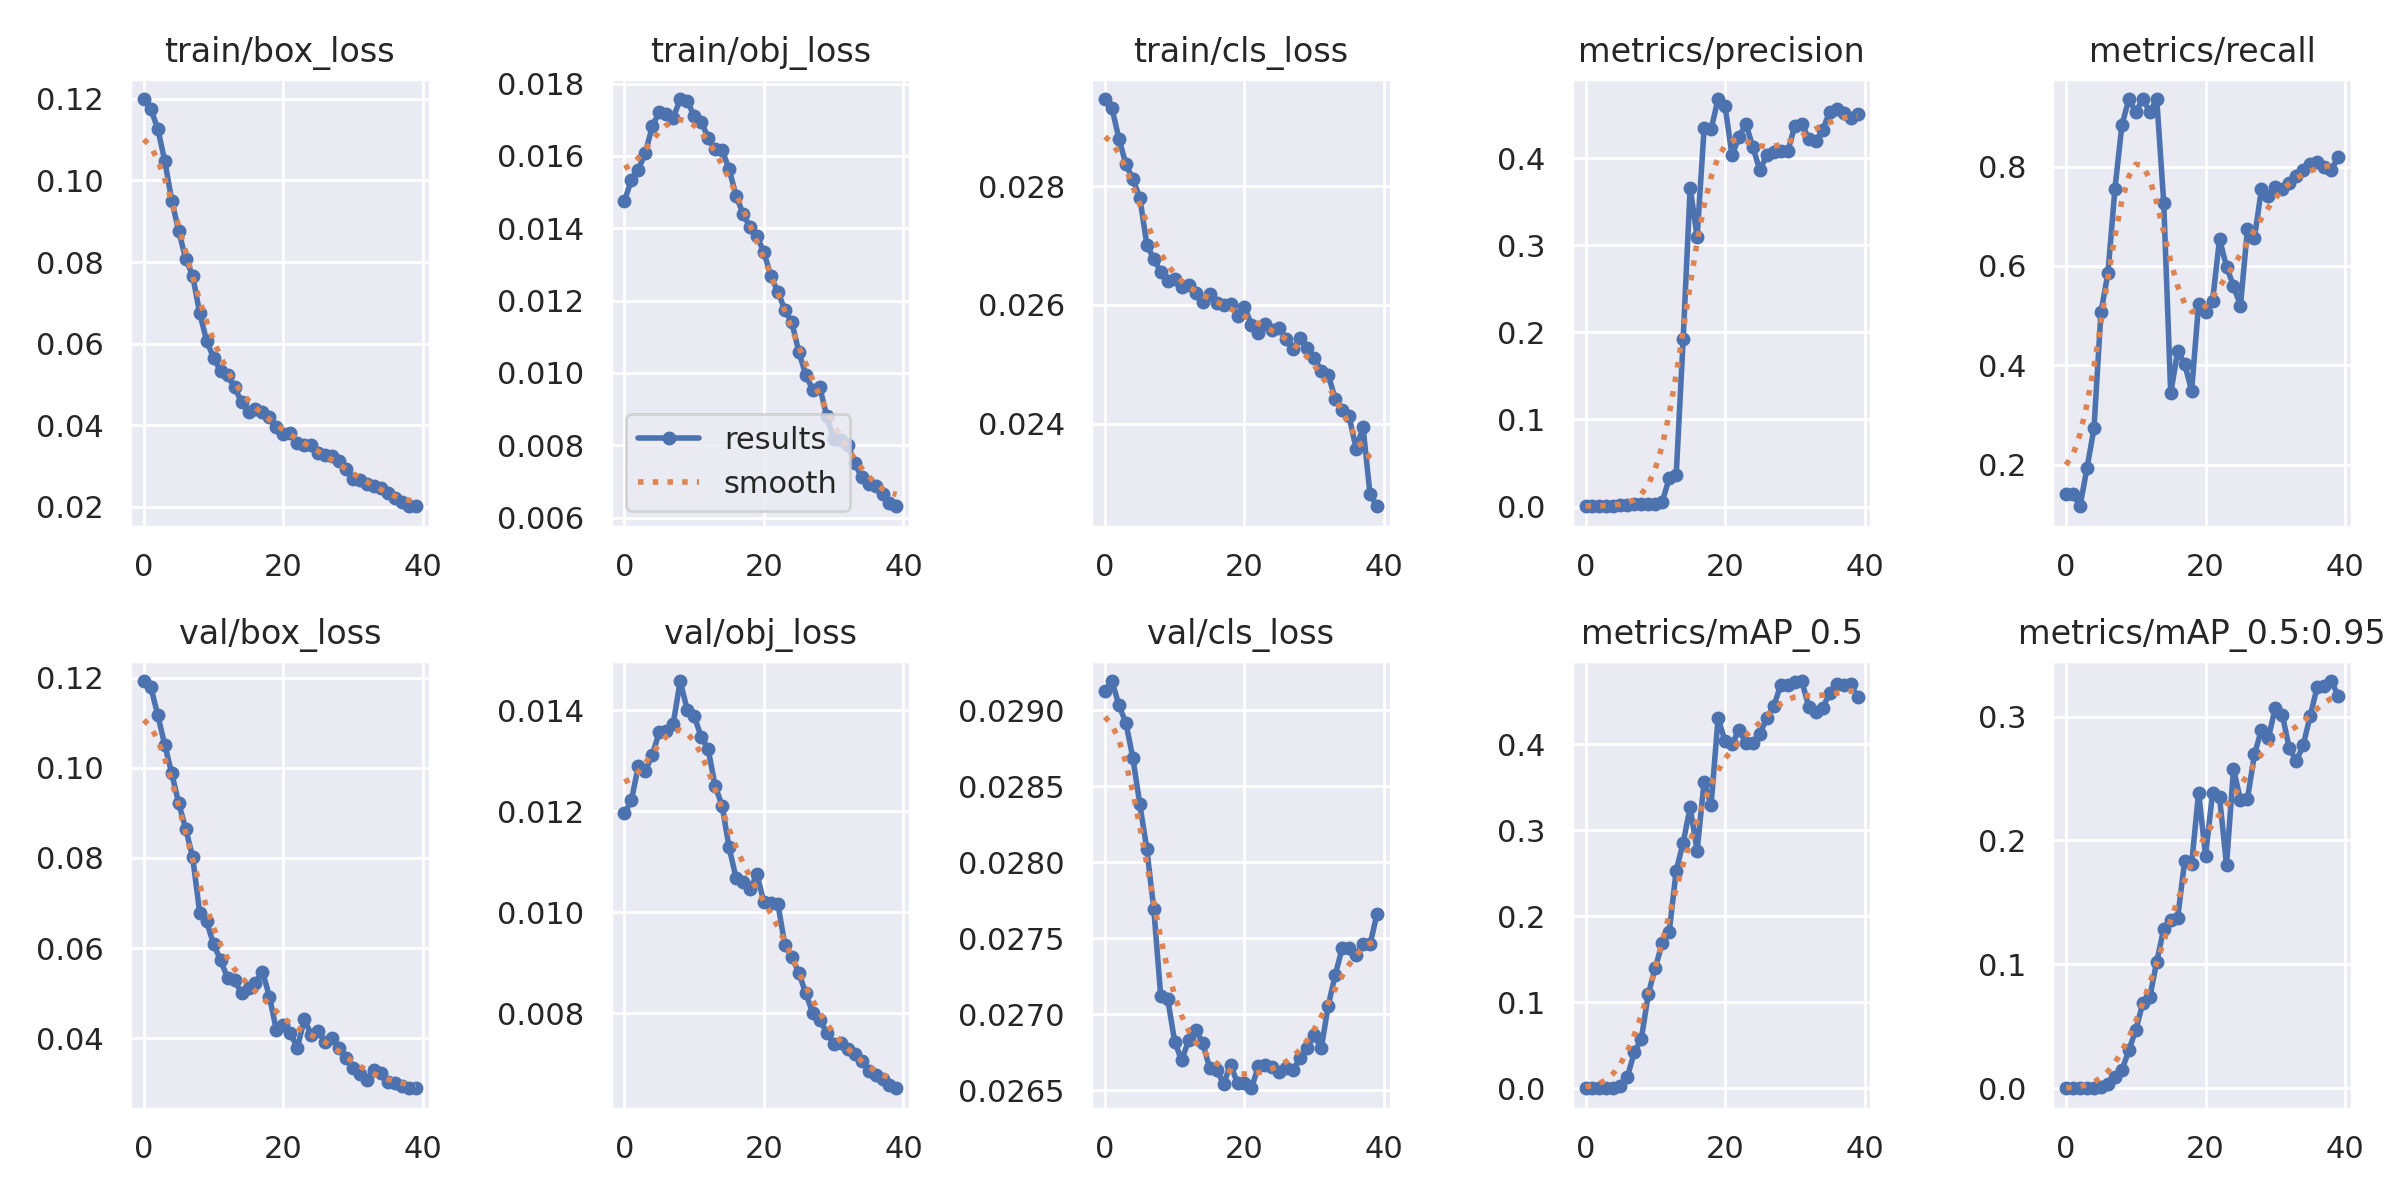

In [29]:
display(Image(filename='yolov5/runs/train/sagittal/results.png'))